# TAREA II - Análisis de Base de Datos con SQLite

## Integrantes:
1. Añorbe Moreno Victoria
2. Cayetano Zaragoza Angel Gabriel
3. Espinosa Hernández Emanuel
4. Hernández Pérez Yamile
5. Liu Villavicencio Sebastián
6. Lemus Prado Victor Daniel
7. Manzo Hernández Carlos Daniel
8. Paz Barron Haniel Zarif
9. Peña Escamilla Israel
10. Roque López Andrea Daniela

##Introdución

### El presente reporte ejecutivo tiene como objetivo el analizar y obtener información de relevancia sobre la base de datos con los que cuenta una empresa que opera dentro del país, incluyendo datos recabados sobre sus productos, clientes y ventas realizadas. El fin principal es, a partir de la utilización de SQL por medio de Google Colab y tomando de apoyo a SAS, realizar consultas haciendo uso de la base de datos y así, por medio de estas consultas, obtener información que pueda resultar útil, y a su vez, sirva como guía y base de la dirección de las acciones a seguir dentro de la empresa, buscando siempre la rentabilidad y un crecimiento en el futuro próximo, enfocando los esfuerzos en decisiones informadas y basadas en las conclusiones resultantes del presente análisis.

In [ ]:
# Agregar esta celda al principio del notebook
!pip install geopandas folium contextily tabulate xlsxwriter # Instala todas las bibliotecas que ocuparemos para este proyecto

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 36.5 MB/s eta 0:00:00


## 1. Importación de Librerías y Configuración Inicial

In [ ]:
import sqlite3 # Bilblioteca para trabajar con base de datos de SQL
import pandas as pd # Biblioteca para analizar y manipular datos en las tablas
import numpy as np # Bibliotecas para calculos y operaciones matemáticas
import matplotlib.pyplot as plt # Biblioteca para hacer gráficos
import seaborn as sns # Biblioteca para hacer los gráficos más detallados
import os # Biblioteca para interactuar con carpetas y archivos
from tabulate import tabulate # Biblioteca para la creación de tablas
from IPython.display import display, HTML # Biblioteca para mostrar los resultados del notebook
import warnings # Biblioteca para controlar los mensajes de advertencia
warnings.filterwarnings('ignore') # Esta línea oculta las advertencias para que el código se vea más limpio
import requests # Biblioteca para descargar datos de internet
import geopandas as gpd # Biblioteca para trabajar con mapas y datos geográficos
import requests

# Configuración para gráficas
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
#Usamos este código para un estilo profesional de gráficos con una paleta de colores fácil de distinguir

# Crear carpeta 'data' si no existe
os.makedirs("data", exist_ok=True)
#Creamos una carpet llamada 'data' para guardar archivos y ocupamos el 'exist_ok=True' para que si la carpeta ya existe no arroge un error

In [ ]:
# Lista de archivos a descargar
archivos = [
    {
        'url': 'https://raw.githubusercontent.com/fliupa/Datos_de_Computo/main/datos/clientes.csv',
        'nombre': 'clientes.csv'
    },
    {
        'url': 'https://raw.githubusercontent.com/fliupa/Datos_de_Computo/main/datos/productos.csv',
        'nombre': 'productos.csv'
    },
    {
        'url': 'https://raw.githubusercontent.com/fliupa/Datos_de_Computo/main/datos/ventas.csv',
        'nombre': 'ventas.csv'
    }
]
#Esta son las 3 listas que vamos a descargar para el proyecto las cuales son información de clientes, información de productos y los registros de venta

# Descargar cada archivo si no existe
#Checaremos la lista de archivos uno por uno
for archivo in archivos:
    ruta_destino = archivo['nombre'] #Nombre donde guardaremos el archivo
    if not os.path.exists(ruta_destino): # Verificamos que el archivo si existe para no volverlo a descargar
        print(f"Descargando {archivo['nombre']} desde GitHub...")
        response = requests.get(archivo['url']) # Verificamos el archivo para la descarga
        response.raise_for_status()  # Si hay un error en la descarga esta se detendra

        with open(ruta_destino, "wb") as f: # Aqui guardamos el archivo
            f.write(response.content) # Se escribe el contenido descargado
        print(f"{archivo['nombre']} descargado exitosamente en data/{archivo['nombre']}!")
    else:
        print(f"{archivo['nombre']} ya existe. No se descargó nuevamente.") # Si el archivo ya existe no lo volvemos a descargar

Descargando clientes.csv desde GitHub...
clientes.csv descargado exitosamente en data/clientes.csv!
Descargando productos.csv desde GitHub...
productos.csv descargado exitosamente en data/productos.csv!
Descargando ventas.csv desde GitHub...
ventas.csv descargado exitosamente en data/ventas.csv!


In [ ]:
#Descargamos el Mapa de México
geojson_url = "https://gist.githubusercontent.com/Tlaloc-Es/5c82834e5e4a9019a91123cb11f598c0/raw/mexico.geojson"#archivo con los datos de mexico

# Descargar el archivo si no existe localmente
if not os.path.exists("admin1.geojson"):# Usar una vez nada más se asegura que no exista el admin1.geojson para descargar el archivo
    print("Descargando admin1.geojson desde GitHub...")
    response = requests.get(geojson_url)# Descargamos el archivo desde internet
    with open("admin1.geojson", "wb") as f: # Guardaremos en archivo de forma binaria para confirmar el archivo
        f.write(response.content)
    print("Archivo descargado exitosamente!")

# Cargar el archivo GeoJSON
#Convertimos el archivo del mapa en un DataFrame especial para mapas
gdf = gpd.read_file("admin1.geojson") #se define el gdf como el archivo admin1.geojson

print("Estados disponibles en el geojson:")


Descargando admin1.geojson desde GitHub...
Archivo descargado exitosamente!
Estados disponibles en el geojson:


In [ ]:
# URL raw del archivo .py
script_url = 'https://raw.githubusercontent.com/fliupa/Datos_de_Computo/refs/heads/main/scripts/funciones_mapas_mexico.py'
# Nombre del archivo en el directorio actual
nombre_archivo = "funciones_mapas_mexico.py"

# Descargar solo si no existe
if not os.path.exists(nombre_archivo): # Como antes volvemos a verificar que el archivo ya extiste para no descargarlo nuevamente
    print("Descargando funciones_mapas_mexico.py desde GitHub...")
    response = requests.get(script_url) # Se descarga el archivo y si hay error se detendra aquí
    response.raise_for_status()

    with open(nombre_archivo, "wb") as f:# Guardamos el archivo en nuestra carpeta actual
        f.write(response.content)
    print("Script descargado exitosamente en el directorio actual!")
else:
    print("El archivo ya existe. No se descargó nuevamente.")

Descargando funciones_mapas_mexico.py desde GitHub...
Script descargado exitosamente en el directorio actual!


### Funciones para Diseño e Impresión de Tablas SQL

In [ ]:
def imprimir_tabla_elegante(df, titulo="Tabla de Resultados", max_rows=20, formato="fancy_grid"):
    """
    Convierte una tabla normal de pandas en una tabla mas elegante y ordenada

    Parámetros:
    - df: La tabla de datos que queremos mostrar
    - titulo: El título que aparecerá arriba de la tabla
    - max_rows: Número máximo de filas a mostrar
    - formato: Estilo de la tabla ('fancy_grid' para texto)
    """
    print(f" {titulo.upper()}") # Mostramos el título en mayúsculas

    if len(df) == 0: # Verificamos que la tabla está vacía
        print(" No se encontraron resultados")
        return

    # Mostrar información básica agregando separadores y la lista de columnas disponibles
    print(f"Total de registros: {len(df):,}")
    print(f"Columnas: {', '.join(df.columns)}")

    # Limitar filas si es necesario
    df_display = df.head(max_rows) if len(df) > max_rows else df

    #Formato html para Jupyter
    if formato == "html":
        # Convertimos la tabla a formato html
        html_table = df_display.to_html(classes='table table-striped table-bordered',
                                       table_id='sql-results',
                                       escape=False)

        # Agregar CSS personalizado para una tabla más llamativa
        css_style = """
        <style>
        #sql-results {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            border-collapse: collapse;
            margin: 20px 0;
            font-size: 14px;
            min-width: 400px;
            border-radius: 8px;
            overflow: hidden;
            box-shadow: 0 4px 8px rgba(0,0,0,0.1);
        }
        #sql-results thead tr {
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            color: white;
            text-align: left;
            font-weight: bold;
        }
        #sql-results th, #sql-results td {
            padding: 12px 15px;
            border: 1px solid #ddd;
        }
        #sql-results tbody tr {
            border-bottom: 1px solid #dddddd;
        }
        #sql-results tbody tr:nth-of-type(even) {
            background-color: #f3f3f3;
        }
        #sql-results tbody tr:hover {
            background-color: #e8f4fd;
            transform: scale(1.01);
            transition: all 0.2s ease;
        }
        </style>
        """

        display(HTML(css_style + html_table)) #Mostramos la tabla ya personalizada

    else:
        # Formato de texto con tabulate
        print("\n" + tabulate(df_display, headers='keys', tablefmt=formato,
                            showindex=False, numalign="right", stralign="left"))

    if len(df) > max_rows: #Si cortamos la tabla le avisaremos al usuario
        print(f"\n  Mostrando solo las primeras {max_rows} filas de {len(df):,} registros totales")


def ejecutar_consulta_con_formato(conn, query, titulo="Consulta SQL", formato="html", max_rows=20):
    """
    Ejecuta una consulta SQL y muestra los resultados con formato elegante

    Parámetros:
    - conn: Conexión a la base de datos SQLite
    - query: Consulta SQL a ejecutar
    - titulo: Título para mostrar
    - formato: Como se mostraran los resultados
    - max_rows: Número máximo de filas a mostrar

    Retorna:
    - DataFrame con los resultados
    """
    try:
        # Ejecutar consulta
        df_resultado = pd.read_sql_query(query, conn)

        # Mostrar consulta SQL
        print("\n" + " CONSULTA SQL EJECUTADA:")
        print(query)

        # Mostrar resultados con el formato dado
        imprimir_tabla_elegante(df_resultado, titulo, max_rows, formato)

        return df_resultado

    except Exception as e:
        print(f" Error al ejecutar consulta: {e}") # Si hay error se mostrará
        return pd.DataFrame() # Se devolverá la tabla vacío si lo hay

def mostrar_estadisticas_tabla(df, titulo="Estadísticas de la Tabla"):
    """
    Analiza una tabla y muestra información útil sobre sus datos

    Parámetros:
    - df: La tabla que queremos analizar
    - titulo: Título para el reporte de estadísticas
    """
    print("\n" + titulo.upper()) # Se mostrará el título en mayúsculas

    if len(df) == 0: #Verificamos que la tabla este vacía
        print(" No hay datos para mostrar estadísticas")
        return

    # Mostramos que tipos de datos hay en cada columna
    print("\n TIPOS DE DATOS:")
    tipos_datos = df.dtypes.value_counts()
    for tipo, cantidad in tipos_datos.items():
        print(f"  * {tipo}: {cantidad} columna(s)")

    # Verificamos si hay datos faltantes, es decir, los valores nulos
    valores_nulos = df.isnull().sum()
    if valores_nulos.sum() > 0:
        print("\n VALORES NULOS:")
        for col, nulos in valores_nulos[valores_nulos > 0].items():
            porcentaje = (nulos / len(df)) * 100
            print(f"  * {col}: {nulos:,} ({porcentaje:.1f}%)")
    else:
        print("\n No hay valores nulos")

    # Se motrarán estadísticas numéricas
    columnas_numericas = df.select_dtypes(include=[np.number]).columns
    if len(columnas_numericas) > 0:
        print("\n ESTADÍSTICAS NUMÉRICAS:")
        stats = df[columnas_numericas].describe() # Se calculan automáticamente las estadísticas
        display(stats.round(2)) #Redondearemos a 2 décimas (0.00)


def crear_reporte_consulta(conn, query, titulo, archivo_csv=None, mostrar_stats=True):
    """
    Función completa que hace todo el proceso: ejecuta consulta, muestra resultados y genera reporte

    Parámetros:
    - conn: Conexión a la base de datos
    - query: Consulta SQL a ejecutar
    - titulo: Nombre del reporte
    - archivo_csv: Si queremos guardar los resultados en un archivo
    - mostrar_stats: Si queremos ver las estadísticas de los datos

    Retorna:
    - Los resultados de la consulta
    """
    print("\n" + " GENERANDO REPORTE: " + titulo.upper()) # Se mostrará el 'GENERANDO REPORTE: ' más el título en mayúsculas

    # Ejecutamos la consulta con el formato dado
    df_resultado = ejecutar_consulta_con_formato(conn, query, titulo, "html", 15)

    if len(df_resultado) > 0:
        # Mostraremos las estadísticas si el usuario lo solicita
        if mostrar_stats:
            mostrar_estadisticas_tabla(df_resultado, f"Estadísticas - {titulo}")

        # Guardamos en CSV si se especifica
        if archivo_csv:
            ruta_archivo = f"data/{archivo_csv}"
            df_resultado.to_csv(ruta_archivo, index=False)
            print(f"\n Resultados guardados en: {ruta_archivo}")

        print(f"\n Reporte '{titulo}' completado exitosamente")
    else:
        print(f"\n No se pudieron generar resultados para '{titulo}'")

    return df_resultado

### Carga de datos en DataFrames

In [ ]:
# Cargamos los 3 archivos CVS en tablas separadas
try:
    df_clientes = pd.read_csv('clientes.csv')
    df_productos = pd.read_csv('productos.csv')
    df_ventas = pd.read_csv('ventas.csv')

# Mostramos cuántos registros tiene cada tabla
    print(f"Clientes: {len(df_clientes)} registros")
    print(f"Productos: {len(df_productos)} registros")
    print(f"Ventas: {len(df_ventas)} registros")

except Exception as e:
    print(f"Error al cargar archivos: {e}") # Si hay una error se mostrará

Clientes: 50 registros
Productos: 60 registros
Ventas: 150 registros


### Exploración inicial de los datos

In [ ]:
# Veremos la informacion que contiene la tabla de clientes
print("TABLA CLIENTES:")
print("Estructura:")
print(df_clientes.info()) # Mostramos informacion técnica sobre la tabla
print("\nPrimeros 5 registros:")
display(df_clientes.head()) # Mostramos las primeras 5 filas de la tabla

TABLA CLIENTES:
Estructura:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID_Cliente  50 non-null     int64 
 1   Nombre      50 non-null     object
 2   Email       50 non-null     object
 3   Telefono    50 non-null     int64 
 4   Ciudad      50 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.1+ KB
None

Primeros 5 registros:


ID_Cliente           Nombre                             Email    Telefono  \
0           1       Ana García         anita.garcia.95@gmail.com  5512345678   
1           2     Carlos López     lobo_carlos_lopez@hotmail.com  3312345678   
2           3  María Hernández          mary.hdz.mty@outlook.com  8112345678   
3           4    Juan Martínez  juancho.martinez.94@yahoo.com.mx  2221234567   
4           5       Laura Díaz  laurita.diaz.rockera@live.com.mx  6641234567   

             Ciudad  
0  Ciudad de México  
1       Guadalajara  
2         Monterrey  
3            Puebla  
4           Tijuana

In [ ]:
# Mostramos toda la información importante sobre los productos que se venden
print("TABLA PRODUCTOS:")
print("Estructura:")
print(df_productos.info()) # Vemos cuántas columnas hay y qué tipo de datos tienen
print("\nPrimeros 5 registros:")
display(df_productos.head()) # Se muestran los primeros 5 registros de productos
print("\nEstadísticas descriptivas:")
display(df_productos.describe()) # Vemos números importantes sobre precios y cantidades

TABLA PRODUCTOS:
Estructura:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_Producto      60 non-null     int64  
 1   Nombre_Producto  60 non-null     object 
 2   Categoria        60 non-null     object 
 3   Precio           60 non-null     float64
 4   Stock            60 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.5+ KB
None

Primeros 5 registros:


ID_Producto         Nombre_Producto    Categoria    Precio  Stock
0            1         Laptop Gamer X1  Electrónica  18999.99     25
1            2   Smartphone Galaxy A55  Electrónica   8999.50     40
2            3           Tablet Pro 10  Electrónica   6599.00     30
3            4  Audífonos Inalámbricos  Electrónica   1299.99     60
4            5      Smartwatch FitPlus  Electrónica   2499.75     35


Estadísticas descriptivas:


ID_Producto        Precio       Stock
count    60.000000     60.000000   60.000000
mean     30.500000   2958.660667   55.283333
std      17.464249   4147.498866   56.345812
min       1.000000     25.000000    5.000000
25%      15.750000    444.125000   19.500000
50%      30.500000   1299.000000   35.000000
75%      45.250000   3524.125000   71.250000
max      60.000000  18999.990000  300.000000

In [ ]:
# Mostramos toda la información sobre las ventas realizadas
print("TABLA VENTAS:")
print("Estructura:")
print(df_ventas.info())  # Vemos el tamaño de la tabla y tipos de datos
print("\nPrimeros 5 registros:")
display(df_ventas.head()) # Se muestran los primeros 5 registros de ventas
print("\nEstadísticas descriptivas:")
display(df_ventas.describe()) # Vemos números clave sobre las ventas

TABLA VENTAS:
Estructura:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID_Venta     150 non-null    int64  
 1   ID_Cliente   150 non-null    int64  
 2   ID_Producto  150 non-null    int64  
 3   Fecha        150 non-null    object 
 4   Cantidad     150 non-null    int64  
 5   Total        150 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 7.2+ KB
None

Primeros 5 registros:


ID_Venta  ID_Cliente  ID_Producto       Fecha  Cantidad    Total
0         1          15           23  2024-01-05         1  8999.00
1         2           8           45  2024-01-07         2   399.98
2         3          22           12  2024-01-08         1   799.50
3         4          37           56  2024-01-10         3  1377.00
4         5           3            7  2024-01-12         1  1899.50


Estadísticas descriptivas:


ID_Venta  ID_Cliente  ID_Producto    Cantidad         Total
count  150.000000  150.000000   150.000000  150.000000    150.000000
mean    75.500000   25.500000    28.866667    2.100000   3110.848133
std     43.445368   14.479214    17.688075    3.311055   4127.473719
min      1.000000    1.000000     1.000000    1.000000    179.000000
25%     38.250000   13.000000    13.000000    1.000000    662.122500
50%     75.500000   25.500000    28.000000    1.000000   1299.000000
75%    112.750000   38.000000    44.000000    1.000000   3499.000000
max    150.000000   50.000000    60.000000   24.000000  18999.990000

## 3. Creación de Base de Datos SQLite

### Conexión y creación de tablas

In [ ]:
# Crear conexión a SQLite
conn = sqlite3.connect('data/tarea_ii_database.db') # Creamos la base de datos
cursor = conn.cursor() # Creamos un 'cursor' para ejecutar comandos en la base de datos

In [ ]:
# Cargar DataFrames a SQLite
try:
    # Guardamos la tabla de clientes en el SQL
    df_clientes.to_sql('clientes', conn, if_exists='replace', index=False)
    print("Tabla 'clientes' creada en SQLite")

    # Guardamos la tabla de productos en el SQL
    df_productos.to_sql('productos', conn, if_exists='replace', index=False)
    print("Tabla 'productos' creada en SQLite")

    # Guardamos la tabla de ventas en el SQL
    df_ventas.to_sql('ventas', conn, if_exists='replace', index=False)
    print("Tabla 'ventas' creada en SQLite")

    print("\nBase de datos SQLite creada exitosamente")

except Exception as e:
    print(f" Error al crear tablas: {e}")

Tabla 'clientes' creada en SQLite
Tabla 'productos' creada en SQLite
Tabla 'ventas' creada en SQLite

Base de datos SQLite creada exitosamente


### Verificación de tablas creadas

In [ ]:
# Revisamos que las tablas creadas a SQL estén bien
# Checamos que las tablas existen en la base de datos
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tablas = cursor.fetchall() # Obtenemos todos los resultados de la consulta

print("Tablas en la base de datos:")
for tabla in tablas:
    print(f"  - {tabla[0]}") # tabla[0] porque cada resultado viene como ('nombre_tabla',)

# Verificamos el número de registros en cada tabla
print("\nNúmero de registros por tabla:")
for tabla in tablas:
    cursor.execute(f"SELECT COUNT(*) FROM {tabla[0]}") # Contamos todos los registros
    count = cursor.fetchone()[0]
    print(f"  - {tabla[0]}: {count} registros")

Tablas en la base de datos:
  - clientes
  - productos
  - ventas

Número de registros por tabla:
  - clientes: 50 registros
  - productos: 60 registros
  - ventas: 150 registros


## 4. Análisis de Relaciones entre Tablas

### Verificación de claves foráneas

In [ ]:
# Verificamos cómo se conectan las tablas entre sí y si hay datos inconsistentes

print("ANÁLISIS DE RELACIONES ENTRE TABLAS:")
print("\n1. Relación Ventas-Clientes (ID_Cliente):")

# Verificamos la relacion entre ventas y productos
query_productos_ventas = """
SELECT
    COUNT(DISTINCT v.ID_Producto) as productos_en_ventas,
    COUNT(DISTINCT p.ID_Producto) as total_productos,
    COUNT(DISTINCT v.ID_Producto) * 100.0 / COUNT(DISTINCT p.ID_Producto) as porcentaje_cobertura
FROM ventas v
LEFT JOIN productos p
"""
# Ejecutamos la consulta y mostramos los resultados
result = pd.read_sql_query(query_productos_ventas, conn)
display(result)

ANÁLISIS DE RELACIONES ENTRE TABLAS:

1. Relación Ventas-Clientes (ID_Cliente):


productos_en_ventas  total_productos  porcentaje_cobertura
0                   60               60                 100.0

## 5. Construcción de Tabla Resultante (JOIN)

### Unión de tablas Ventas, Clientes y Productos

In [ ]:
# Unimos las 3 tablas en una sola
# Consultamos un SQL para la creacion de una sola tabla
query_union = """
CREATE TABLE IF NOT EXISTS reporte_ventas_completo AS
SELECT
    v.ID_Venta,                    -- Número único de cada venta
    v.Fecha,                       -- Fecha en que se hizo la venta
    c.ID_Cliente,                  -- Identificador del cliente
    c.Nombre as Nombre_Cliente,    -- Nombre completo del cliente
    c.Email,                       -- Email de contacto del cliente
    c.Ciudad,                      -- Ciudad donde vive el cliente
    p.ID_Producto,                 -- Identificador del producto
    p.Nombre_Producto,             -- Nombre del producto vendido
    p.Categoria,                   -- Categoría del producto (ej: electrónicos, ropa)
    p.Precio as Precio_Unitario,   -- Precio de una sola unidad del producto
    v.Cantidad,                    -- Cuántas unidades se vendieron
    v.Total as Total_Venta,        -- Total que se cobró en la venta
    (p.Precio * v.Cantidad) as Total_Calculado,  -- Lo que debería haberse cobrado
    CASE
        WHEN v.Total = (p.Precio * v.Cantidad) THEN 'Correcto'
        ELSE 'Discrepancia'
    END as Validacion_Total        -- Verifica si los totales coinciden
FROM ventas v
LEFT JOIN clientes c ON v.ID_Cliente = c.ID_Cliente       -- Une ventas con clientes
LEFT JOIN productos p ON v.ID_Producto = p.ID_Producto    -- Une ventas con productos
"""

try:
    cursor.execute("DROP TABLE IF EXISTS reporte_ventas_completo")  # Primero eliminamos la tabla si ya existía
    cursor.execute(query_union) # Ejecutamos la consulta para crear la nueva tabla
    conn.commit() # Guardamos los cambios en la base de datos
    print("Tabla 'reporte_ventas_completo' creada exitosamente")

    # Contamos cuantos registros se crearon
    cursor.execute("SELECT COUNT(*) FROM reporte_ventas_completo")
    count = cursor.fetchone()[0]
    print(f"Registros en tabla resultante: {count}")

except Exception as e:
    print(f"Error al crear tabla resultante: {e}")

Tabla 'reporte_ventas_completo' creada exitosamente
Registros en tabla resultante: 150



Resumen de Validación de Totales:
  Validacion_Total  cantidad
0         Correcto       148
1     Discrepancia         2


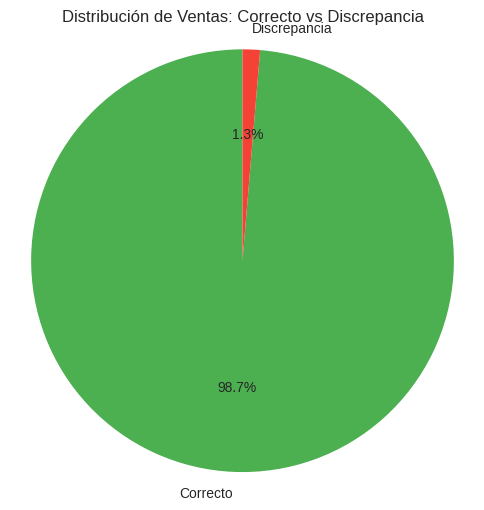

In [ ]:
# Consulta SQL para agrupar por validación
query_validacion = """
SELECT
    Validacion_Total,
    COUNT(*) AS cantidad
FROM reporte_ventas_completo
GROUP BY Validacion_Total
"""

# Ejecutar la consulta y cargar en DataFrame
df_validacion = pd.read_sql_query(query_validacion, conn)

# Mostrar los datos de resumen
print("\nResumen de Validación de Totales:")
print(df_validacion)

# Crear grafico de pastel
plt.figure(figsize=(6, 6))
plt.pie(
    df_validacion['cantidad'],
    labels=df_validacion['Validacion_Total'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4CAF50', '#F44336']  # Verde para 'Correcto', rojo para 'Discrepancia'
)
plt.title('Distribución de Ventas: Correcto vs Discrepancia')
plt.axis('equal')  # Mantiene el círculo proporcionado
plt.savefig('data/Distribución de Ventas: Correcto vs Discrepancia.png', dpi=300, bbox_inches='tight')
plt.show()

### Visualización de la tabla resultante

In [ ]:
# Mostramos los primeros 10 registros de nuestra tabla ya unida
# Consultamos los primeros 10 registros
query_muestra = "SELECT * FROM reporte_ventas_completo LIMIT 10"
df_reporte = pd.read_sql_query(query_muestra, conn)

print("TABLA RESULTANTE - REPORTE VENTAS COMPLETO:")
print("Primeros 10 registros:")
display(df_reporte) # Mostramos la tabla ya con fomato

# Información de la tabla
print("\nEstructura de la tabla resultante:")
print(df_reporte.info()) # Se muestran los tipos de datos, columnas, etc.

TABLA RESULTANTE - REPORTE VENTAS COMPLETO:
Primeros 10 registros:


ID_Venta       Fecha  ID_Cliente   Nombre_Cliente  \
0         1  2024-01-05          15    Carolina Soto   
1         2  2024-01-07           8    Miguel Torres   
2         3  2024-01-08          22    Arturo Medina   
3         4  2024-01-10          37   Gloria Miranda   
4         5  2024-01-12           3  María Hernández   
5         6  2024-01-14          29     Natalia Vega   
6         7  2024-01-15          41     Lucia Zamora   
7         8  2024-01-16          12     Pablo Vargas   
8         9  2024-01-18           5       Laura Díaz   
9        10  2024-01-19          18     Oscar Guzmán   

                              Email         Ciudad  ID_Producto  \
0     carosoto.veracruz@outlook.com       Veracruz           23   
1       mike.torres.qro@hotmail.com      Querétaro           45   
2   art.medina.campeche@outlook.com       Campeche           12   
3   glo.miranda.nogales@hotmail.com        Nogales           56   
4          mary.hdz.mty@outlook.com      Monterrey            7   
5     nata.vega.chetumal@icloud.com       Chetumal           34   
6      lulu.zamora.coatza@gmail.com  Coatzacoalcos           19   
7        elvargas.morelia@yahoo.com        Morelia            8   
8  laurita.diaz.rockera@live.com.mx        Tijuana           41   
9         ozzy.guzman.maz@gmail.com       Mazatlán           29   

        Nombre_Producto    Categoria  Precio_Unitario  Cantidad  Total_Venta  \
0     Bicicleta Montaña     Deportes          8999.00         1      8999.00   
1       Cepillo Cabello      Belleza           199.99         2       399.98   
2        Jeans Slim Fit         Ropa           799.50         1       799.50   
3            Vino Tinto      Bebidas           459.00         3      1377.00   
4  Batidora Profesional        Hogar          1899.50         1      1899.50   
5    Videojuego FIFA 25  Electrónica          1399.00         1      1399.00   
6  Cuaderno Profesional       Libros           199.99         5       999.95   
7          Licuadora 2L        Hogar           899.99         1       899.99   
8     Shampoo Anticaída      Belleza           299.50         2       599.00   
9      Tostador Digital       Cocina           899.00         1       899.00   

   Total_Calculado Validacion_Total  
0          8999.00         Correcto  
1           399.98         Correcto  
2           799.50         Correcto  
3          1377.00         Correcto  
4          1899.50         Correcto  
5          1399.00         Correcto  
6           999.95         Correcto  
7           899.99         Correcto  
8           599.00         Correcto  
9           899.00         Correcto


Estructura de la tabla resultante:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_Venta          10 non-null     int64  
 1   Fecha             10 non-null     object 
 2   ID_Cliente        10 non-null     int64  
 3   Nombre_Cliente    10 non-null     object 
 4   Email             10 non-null     object 
 5   Ciudad            10 non-null     object 
 6   ID_Producto       10 non-null     int64  
 7   Nombre_Producto   10 non-null     object 
 8   Categoria         10 non-null     object 
 9   Precio_Unitario   10 non-null     float64
 10  Cantidad          10 non-null     int64  
 11  Total_Venta       10 non-null     float64
 12  Total_Calculado   10 non-null     float64
 13  Validacion_Total  10 non-null     object 
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ KB
None


## 6. Construcción de Reporte con Información de Múltiples Tablas

In [ ]:
# Generamos un reporte de ventas por categoría y ciudad
query_reporte = """
SELECT
    Categoria,                          -- Tipo de producto (electrónicos, ropa, etc.)
    Ciudad,                             -- Ciudad donde vive el cliente
    COUNT(*) as Num_Ventas,             -- Cuántas ventas se hicieron
    SUM(Cantidad) as Total_Productos_Vendidos,  -- Total de unidades vendidas
    SUM(Total_Venta) as Ingresos_Total, -- Dinero total generado
    AVG(Total_Venta) as Promedio_Venta, -- Promedio de cada venta
    MIN(Total_Venta) as Venta_Minima,   -- Venta más pequeña
    MAX(Total_Venta) as Venta_Maxima    -- Venta más grande
FROM reporte_ventas_completo
WHERE Nombre_Cliente IS NOT NULL        -- Solo ventas con cliente válido
    AND Nombre_Producto IS NOT NULL     -- Solo ventas con producto válido
GROUP BY Categoria, Ciudad              -- Agrupar por tipo de producto y ciudad
ORDER BY Ingresos_Total DESC            -- Ordenar de mayor a menor ingreso
"""

# Ejecutamos la consulta y obtenemos los resultados
df_reporte_resumen = pd.read_sql_query(query_reporte, conn)

print("REPORTE DE VENTAS POR CATEGORÍA Y CIUDAD:")
display(df_reporte_resumen) # Mostramos el reporte con el formato de tabla

# Guardar reporte en CSV
df_reporte_resumen.to_csv('data/reporte_ventas_categoria_ciudad.csv', index=False)
print("\nReporte guardado en: data/reporte_ventas_categoria_ciudad.csv")

REPORTE DE VENTAS POR CATEGORÍA Y CIUDAD:


Categoria            Ciudad  Num_Ventas  Total_Productos_Vendidos  \
0    Electrónica           Pachuca           1                         1   
1    Electrónica  Tuxtla Gutiérrez           1                         1   
2    Electrónica      Villahermosa           1                         1   
3    Electrónica           Tampico           2                         2   
4    Electrónica          Saltillo           2                         2   
..           ...               ...         ...                       ...   
132      Belleza  Ciudad de México           1                         1   
133      Bebidas          Campeche           1                         8   
134    Alimentos            Colima           1                         5   
135      Bebidas      Villahermosa           1                         6   
136    Alimentos         Querétaro           1                         2   

     Ingresos_Total  Promedio_Venta  Venta_Minima  Venta_Maxima  
0          18999.99       18999.990      18999.99      18999.99  
1          18999.99       18999.990      18999.99      18999.99  
2          18999.99       18999.990      18999.99      18999.99  
3          16398.00        8199.000       1399.00      14999.00  
4          16298.99        8149.495       1299.99      14999.00  
..              ...             ...           ...           ...  
132          299.50         299.500        299.50        299.50  
133          284.00         284.000        284.00        284.00  
134          229.95         229.950        229.95        229.95  
135          213.00         213.000        213.00        213.00  
136          179.00         179.000        179.00        179.00  

[137 rows x 8 columns]


Reporte guardado en: data/reporte_ventas_categoria_ciudad.csv


REPORTE DE VENTAS POR CATEGORÍA Y CIUDAD:
     Categoria            Ciudad  Num_Ventas  Total_Productos_Vendidos  \
0  Electrónica           Pachuca           1                         1   
1  Electrónica  Tuxtla Gutiérrez           1                         1   
2  Electrónica      Villahermosa           1                         1   
3  Electrónica           Tampico           2                         2   
4  Electrónica          Saltillo           2                         2   

   Ingresos_Total  Promedio_Venta  Venta_Minima  Venta_Maxima  
0        18999.99       18999.990      18999.99      18999.99  
1        18999.99       18999.990      18999.99      18999.99  
2        18999.99       18999.990      18999.99      18999.99  
3        16398.00        8199.000       1399.00      14999.00  
4        16298.99        8149.495       1299.99      14999.00  


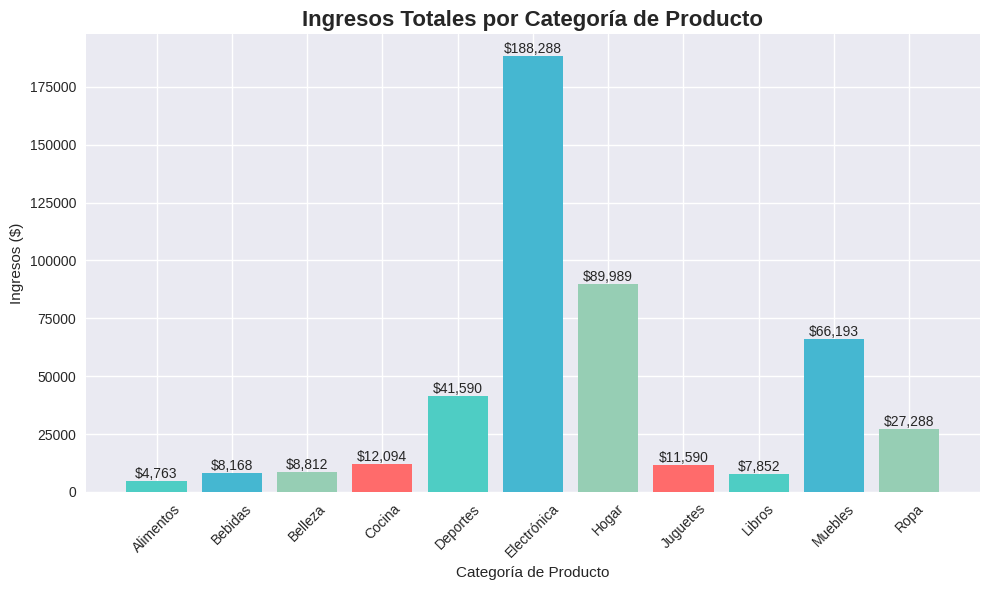

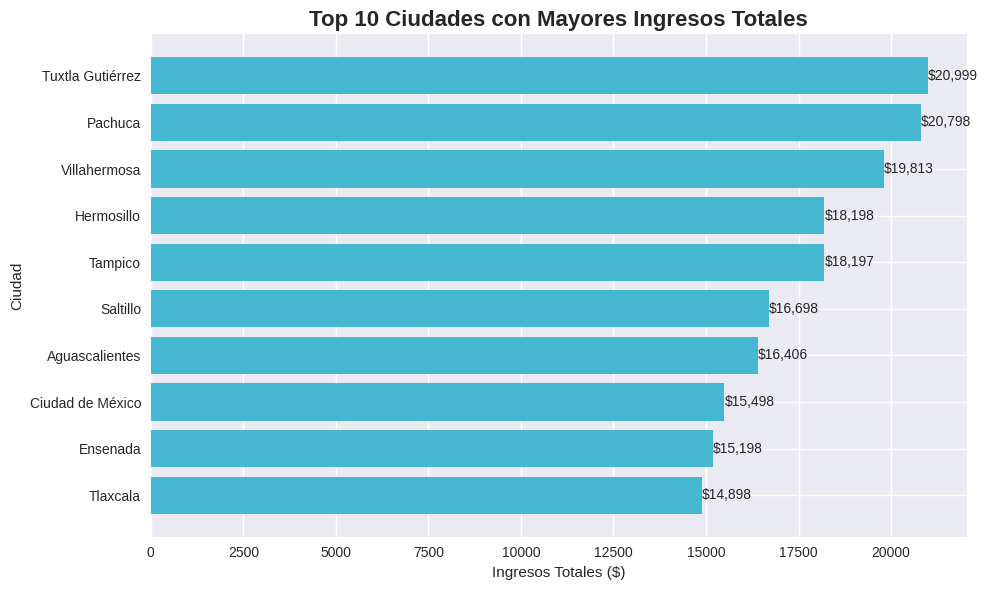

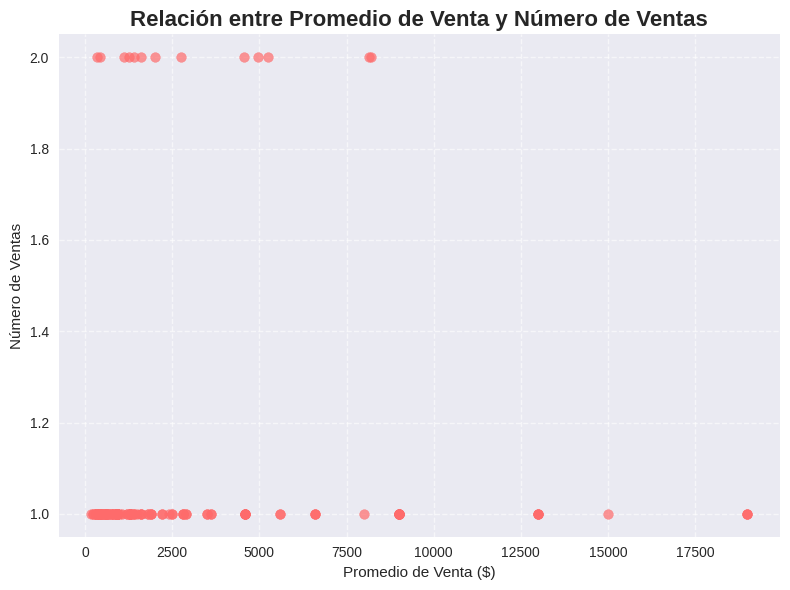


Reporte guardado en: data/reporte_ventas_categoria_ciudad.csv


In [ ]:
# Consulta SQL
query_reporte = """
SELECT
    Categoria,
    Ciudad,
    COUNT(*) as Num_Ventas,
    SUM(Cantidad) as Total_Productos_Vendidos,
    SUM(Total_Venta) as Ingresos_Total,
    AVG(Total_Venta) as Promedio_Venta,
    MIN(Total_Venta) as Venta_Minima,
    MAX(Total_Venta) as Venta_Maxima
FROM reporte_ventas_completo
WHERE Nombre_Cliente IS NOT NULL
    AND Nombre_Producto IS NOT NULL
GROUP BY Categoria, Ciudad
ORDER BY Ingresos_Total DESC
"""

# Ejecutar la consulta y guardar los resultados
df_reporte_resumen = pd.read_sql_query(query_reporte, conn)

print("REPORTE DE VENTAS POR CATEGORÍA Y CIUDAD:")
print(df_reporte_resumen.head())


#  Gráfica de barras: Ingresos totales por categoría

df_categoria = df_reporte_resumen.groupby('Categoria')['Ingresos_Total'].sum().reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(df_categoria['Categoria'], df_categoria['Ingresos_Total'], color=['#4ECDC4', '#45B7D1', '#96CEB4', '#FF6B6B'])
plt.title('Ingresos Totales por Categoría de Producto', fontsize=16, fontweight='bold')
plt.xlabel('Categoría de Producto')
plt.ylabel('Ingresos ($)')
plt.xticks(rotation=45)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
             f'${bar.get_height():,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('data/Ingresos Totales por Categoría de Producto.png', dpi=300, bbox_inches='tight')
plt.show()


#  Gráfica comparativa: Ciudades con mayores ingresos

df_ciudad = df_reporte_resumen.groupby('Ciudad')['Ingresos_Total'].sum().reset_index().sort_values(by='Ingresos_Total', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(df_ciudad['Ciudad'], df_ciudad['Ingresos_Total'], color='#45B7D1')
plt.title('Top 10 Ciudades con Mayores Ingresos Totales', fontsize=16, fontweight='bold')
plt.xlabel('Ingresos Totales ($)')
plt.ylabel('Ciudad')
plt.gca().invert_yaxis()

for i, v in enumerate(df_ciudad['Ingresos_Total']):
    plt.text(v, i, f'${v:,.0f}', va='center')

plt.tight_layout()
plt.savefig('data/Top 10 Ciudades con Mayores Ingresos Totales.png', dpi=300, bbox_inches='tight')
plt.show()


#  Gráfica de dispersión: Relación entre promedio y cantidad de ventas

plt.figure(figsize=(8, 6))
plt.scatter(df_reporte_resumen['Promedio_Venta'], df_reporte_resumen['Num_Ventas'], alpha=0.7, color='#FF6B6B')
plt.title('Relación entre Promedio de Venta y Número de Ventas', fontsize=16, fontweight='bold')
plt.xlabel('Promedio de Venta ($)')
plt.ylabel('Número de Ventas')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('data/Relación entre Promedio de Venta y Número de Ventas.png', dpi=300, bbox_inches='tight')
plt.show()

# Guardar reporte como CSV
df_reporte_resumen.to_csv('data/reporte_ventas_categoria_ciudad.csv', index=False)
print("\nReporte guardado en: data/reporte_ventas_categoria_ciudad.csv")

In [ ]:
# Creamos un reporte con mejor formato

df_ventas_altas = crear_reporte_consulta(
    conn, # Conexión a la base de datos
    query_reporte, # Consultamos el SQL creado
    "reporte_ventas_categoria_ciudad", # Le pondremos título al reporte
    mostrar_stats=True # Incluimos el análisis estadístico
)


 GENERANDO REPORTE: REPORTE_VENTAS_CATEGORIA_CIUDAD

 CONSULTA SQL EJECUTADA:

SELECT
    Categoria,
    Ciudad,
    COUNT(*) as Num_Ventas,
    SUM(Cantidad) as Total_Productos_Vendidos,
    SUM(Total_Venta) as Ingresos_Total,
    AVG(Total_Venta) as Promedio_Venta,
    MIN(Total_Venta) as Venta_Minima,
    MAX(Total_Venta) as Venta_Maxima
FROM reporte_ventas_completo
WHERE Nombre_Cliente IS NOT NULL
    AND Nombre_Producto IS NOT NULL
GROUP BY Categoria, Ciudad
ORDER BY Ingresos_Total DESC

 REPORTE_VENTAS_CATEGORIA_CIUDAD
Total de registros: 137
Columnas: Categoria, Ciudad, Num_Ventas, Total_Productos_Vendidos, Ingresos_Total, Promedio_Venta, Venta_Minima, Venta_Maxima



  Mostrando solo las primeras 15 filas de 137 registros totales

ESTADÍSTICAS - REPORTE_VENTAS_CATEGORIA_CIUDAD

 TIPOS DE DATOS:
  * float64: 4 columna(s)
  * object: 2 columna(s)
  * int64: 2 columna(s)

 No hay valores nulos

 ESTADÍSTICAS NUMÉRICAS:


Num_Ventas  Total_Productos_Vendidos  Ingresos_Total  Promedio_Venta  \
count      137.00                    137.00          137.00          137.00   
mean         1.09                      2.30         3406.04         3099.75   
std          0.29                      3.43         4377.82         4024.61   
min          1.00                      1.00          179.00          179.00   
25%          1.00                      1.00          699.99          649.50   
50%          1.00                      1.00         1299.50         1299.00   
75%          1.00                      2.00         4599.00         3599.50   
max          2.00                     24.00        18999.99        18999.99   

       Venta_Minima  Venta_Maxima  
count        137.00        137.00  
mean        2913.83       3285.66  
std         3985.93       4270.93  
min          179.00        179.00  
25%          649.50        649.50  
50%         1299.00       1299.50  
75%         2899.00       4599.00  
max        18999.99      18999.99


 Reporte 'reporte_ventas_categoria_ciudad' completado exitosamente


## 7. Consultas con Operadores (LIKE, >, <, =)




### Consulta 1: LIKE - Buscar clientes con email de Gmail


In [ ]:
# Consulta 1: En esta consulta buscamos clientes que usen Gmail y analizar sus patrones de compra
# LIKE - Clientes con email de Gmail
query_like = """
SELECT
    Nombre_Cliente,          -- Nombre del cliente
    Email,                   -- Dirección de correo electrónico
    Ciudad,                  -- Ciudad donde vive
    COUNT(*) as Num_Compras, -- Cuántas compras ha realizado
    SUM(Total_Venta) as Total_Gastado -- Cuánto dinero ha gastado en total
FROM reporte_ventas_completo
WHERE Email LIKE '%gmail.com%'  -- Filtra solo emails que contengan 'gmail.com'
GROUP BY Nombre_Cliente, Email, Ciudad  -- Agrupa por cliente único
ORDER BY Total_Gastado DESC  -- Ordena de mayor a menor gasto
"""

#Ejecutamos la consulta con nuestra función
df_gmail = crear_reporte_consulta(
    conn, # Conexión a la base de datos
    query_like, # Consultamos el SQL con filtro LIKE
    "Clientes con Email de Gmail", # Título descriptivo del reporte
    "clientes_gmail.csv", # Guardamos resultados en este archivo
    mostrar_stats=True # Incluimos el análisis estadístico
)


 GENERANDO REPORTE: CLIENTES CON EMAIL DE GMAIL

 CONSULTA SQL EJECUTADA:

SELECT
    Nombre_Cliente,          -- Nombre del cliente
    Email,                   -- Dirección de correo electrónico
    Ciudad,                  -- Ciudad donde vive
    COUNT(*) as Num_Compras, -- Cuántas compras ha realizado
    SUM(Total_Venta) as Total_Gastado -- Cuánto dinero ha gastado en total
FROM reporte_ventas_completo
WHERE Email LIKE '%gmail.com%'  -- Filtra solo emails que contengan 'gmail.com'
GROUP BY Nombre_Cliente, Email, Ciudad  -- Agrupa por cliente único
ORDER BY Total_Gastado DESC  -- Ordena de mayor a menor gasto

 CLIENTES CON EMAIL DE GMAIL
Total de registros: 13
Columnas: Nombre_Cliente, Email, Ciudad, Num_Compras, Total_Gastado



ESTADÍSTICAS - CLIENTES CON EMAIL DE GMAIL

 TIPOS DE DATOS:
  * object: 3 columna(s)
  * int64: 1 columna(s)
  * float64: 1 columna(s)

 No hay valores nulos

 ESTADÍSTICAS NUMÉRICAS:


Num_Compras  Total_Gastado
count         13.0          13.00
mean           3.0        9159.10
std            0.0        5857.93
min            3.0        2766.50
25%            3.0        4614.00
50%            3.0        6824.49
75%            3.0       15498.00
max            3.0       18197.99


 Resultados guardados en: data/clientes_gmail.csv

 Reporte 'Clientes con Email de Gmail' completado exitosamente


### Consulta 2: > - Ventas mayores a $5,000

In [ ]:
# Consulta 2: Consultas de ventas altas
# Checamos  Ventas mayores a $5,000
query_mayor = """
SELECT
    ID_Venta,           -- Número único de la venta
    Fecha,              -- Cuándo se realizó la venta
    Nombre_Cliente,     -- Quién hizo la compra
    Ciudad,             -- Dónde vive el cliente
    Nombre_Producto,    -- Qué producto compró
    Categoria,          -- Tipo de producto
    Cantidad,           -- Cuántas unidades
    Total_Venta         -- Monto total de la venta
FROM reporte_ventas_completo
WHERE Total_Venta > 5000  -- Solo ventas mayores a $5,000 pesos
ORDER BY Total_Venta DESC  -- Las ventas más grandes aparecen primero
"""

# Ejecutamos la consulta con formato
df_ventas_altas = crear_reporte_consulta(
    conn, # Conexión a la base de datos
    query_mayor, # Consultamos el SQL con filtro
    "Ventas Mayores a $5,000", # Título claro del reporte
    "ventas_mayores_5000.csv", # Guardamos en archivo CSV
    mostrar_stats=True # Incluimos el análisis estadístico
)


 GENERANDO REPORTE: VENTAS MAYORES A $5,000

 CONSULTA SQL EJECUTADA:

SELECT
    ID_Venta,           -- Número único de la venta
    Fecha,              -- Cuándo se realizó la venta
    Nombre_Cliente,     -- Quién hizo la compra
    Ciudad,             -- Dónde vive el cliente
    Nombre_Producto,    -- Qué producto compró
    Categoria,          -- Tipo de producto
    Cantidad,           -- Cuántas unidades
    Total_Venta         -- Monto total de la venta
FROM reporte_ventas_completo
WHERE Total_Venta > 5000  -- Solo ventas mayores a $5,000 pesos
ORDER BY Total_Venta DESC  -- Las ventas más grandes aparecen primero

 VENTAS MAYORES A $5,000
Total de registros: 28
Columnas: ID_Venta, Fecha, Nombre_Cliente, Ciudad, Nombre_Producto, Categoria, Cantidad, Total_Venta



  Mostrando solo las primeras 15 filas de 28 registros totales

ESTADÍSTICAS - VENTAS MAYORES A $5,000

 TIPOS DE DATOS:
  * object: 5 columna(s)
  * int64: 2 columna(s)
  * float64: 1 columna(s)

 No hay valores nulos

 ESTADÍSTICAS NUMÉRICAS:


ID_Venta  Cantidad  Total_Venta
count     28.00      28.0        28.00
mean      82.18       1.0     10592.23
std       44.84       0.0      4104.74
min        1.00       1.0      5599.99
25%       43.50       1.0      7999.99
50%       83.50       1.0      8999.50
75%      124.25       1.0     12999.00
max      147.00       1.0     18999.99


 Resultados guardados en: data/ventas_mayores_5000.csv

 Reporte 'Ventas Mayores a $5,000' completado exitosamente


### Consulta 3: < - Productos con precio menor a $1,000

In [ ]:
# Consulta 3: Ventas de bajo valor
# Checamos productos con precio menor a $1,000
query_menor = """
SELECT
    Nombre_Producto,        -- Nombre del producto económico
    Categoria,              -- Tipo de producto
    Precio_Unitario,        -- Precio de cada unidad (menor a $1,000)
    COUNT(*) as Veces_Vendido,      -- Cuántas veces se vendió este producto
    SUM(Cantidad) as Total_Unidades, -- Total de unidades vendidas
    SUM(Total_Venta) as Ingresos_Generados -- Dinero total generado por este producto
FROM reporte_ventas_completo
WHERE Precio_Unitario < 1000  -- Solo productos con precio menor a $1,000
GROUP BY Nombre_Producto, Categoria, Precio_Unitario  -- Agrupa por producto único
ORDER BY Ingresos_Generados DESC  -- Ordena por mayor ingreso generado
"""

# Usar la nueva función de diseño elegante
df_productos_baratos = crear_reporte_consulta(
    conn,
    query_menor,
    "Productos con Precio Menor a $1,000",
    "productos_menores_1000.csv",
    mostrar_stats=True
)


 GENERANDO REPORTE: PRODUCTOS CON PRECIO MENOR A $1,000

 CONSULTA SQL EJECUTADA:

SELECT
    Nombre_Producto,        -- Nombre del producto económico
    Categoria,              -- Tipo de producto
    Precio_Unitario,        -- Precio de cada unidad (menor a $1,000)
    COUNT(*) as Veces_Vendido,      -- Cuántas veces se vendió este producto
    SUM(Cantidad) as Total_Unidades, -- Total de unidades vendidas
    SUM(Total_Venta) as Ingresos_Generados -- Dinero total generado por este producto
FROM reporte_ventas_completo
WHERE Precio_Unitario < 1000  -- Solo productos con precio menor a $1,000
GROUP BY Nombre_Producto, Categoria, Precio_Unitario  -- Agrupa por producto único
ORDER BY Ingresos_Generados DESC  -- Ordena por mayor ingreso generado

 PRODUCTOS CON PRECIO MENOR A $1,000
Total de registros: 29
Columnas: Nombre_Producto, Categoria, Precio_Unitario, Veces_Vendido, Total_Unidades, Ingresos_Generados



  Mostrando solo las primeras 15 filas de 29 registros totales

ESTADÍSTICAS - PRODUCTOS CON PRECIO MENOR A $1,000

 TIPOS DE DATOS:
  * object: 2 columna(s)
  * float64: 2 columna(s)
  * int64: 2 columna(s)

 No hay valores nulos

 ESTADÍSTICAS NUMÉRICAS:


Precio_Unitario  Veces_Vendido  Total_Unidades  Ingresos_Generados
count            29.00          29.00           29.00               29.00
mean            432.43           2.52            8.21             1768.24
std             314.80           0.51            9.25              895.85
min              25.00           2.00            2.00              497.00
25%             159.00           2.00            3.00              919.00
50%             399.50           3.00            4.00             1422.00
75%             699.99           3.00            9.00             2697.00
max             899.99           3.00           36.00             3213.00


 Resultados guardados en: data/productos_menores_1000.csv

 Reporte 'Productos con Precio Menor a $1,000' completado exitosamente


### Consulta 4: = - Ventas de categoría específica (Electrónica)

In [ ]:
# Consulta 4: Ventas solamente de la categoría electrónica
# Checamos las ventas de la categoría electrónica
query_igual = """
SELECT
    Fecha,                  -- Cuándo se realizó la venta
    Nombre_Cliente,         -- Quién compró el electrónico
    Ciudad,                 -- Dónde vive el cliente
    Nombre_Producto,        -- Qué producto electrónico compró
    Precio_Unitario,        -- Precio de cada unidad
    Cantidad,               -- Cuántas unidades compró
    Total_Venta,            -- Monto total de la venta
    strftime('%m', Fecha) as Mes  -- Extrae el mes de la fecha para análisis temporal
FROM reporte_ventas_completo
WHERE Categoria = 'Electrónica'  -- Solo ventas de la categoría Electrónica
ORDER BY Fecha DESC  -- Ordena de la venta más reciente a la más antigua
"""

# Usar la nueva función de diseño elegante
df_electronica = crear_reporte_consulta(
    conn, # Conexión a la base de datos
    query_igual, # Consultamos el SQL con filtro =
    "Ventas de Categoría Electrónica", # Título específico
    "ventas_electronica.csv", # Guardamos en archivo CSV
    mostrar_stats=True # Incluimos el análisis estadístico
)


 GENERANDO REPORTE: VENTAS DE CATEGORÍA ELECTRÓNICA

 CONSULTA SQL EJECUTADA:

SELECT
    Fecha,                  -- Cuándo se realizó la venta
    Nombre_Cliente,         -- Quién compró el electrónico
    Ciudad,                 -- Dónde vive el cliente
    Nombre_Producto,        -- Qué producto electrónico compró
    Precio_Unitario,        -- Precio de cada unidad
    Cantidad,               -- Cuántas unidades compró
    Total_Venta,            -- Monto total de la venta
    strftime('%m', Fecha) as Mes  -- Extrae el mes de la fecha para análisis temporal
FROM reporte_ventas_completo
WHERE Categoria = 'Electrónica'  -- Solo ventas de la categoría Electrónica
ORDER BY Fecha DESC  -- Ordena de la venta más reciente a la más antigua

 VENTAS DE CATEGORÍA ELECTRÓNICA
Total de registros: 24
Columnas: Fecha, Nombre_Cliente, Ciudad, Nombre_Producto, Precio_Unitario, Cantidad, Total_Venta, Mes



  Mostrando solo las primeras 15 filas de 24 registros totales

ESTADÍSTICAS - VENTAS DE CATEGORÍA ELECTRÓNICA

 TIPOS DE DATOS:
  * object: 5 columna(s)
  * float64: 2 columna(s)
  * int64: 1 columna(s)

 No hay valores nulos

 ESTADÍSTICAS NUMÉRICAS:


Precio_Unitario  Cantidad  Total_Venta
count            24.00      24.0        24.00
mean           7845.32       1.0      7845.32
std            6088.67       0.0      6088.67
min            1299.99       1.0      1299.99
25%            2499.75       1.0      2499.75
50%            6599.00       1.0      6599.00
75%           10499.38       1.0     10499.38
max           18999.99       1.0     18999.99


 Resultados guardados en: data/ventas_electronica.csv

 Reporte 'Ventas de Categoría Electrónica' completado exitosamente


## 8. Visualizaciones y Análisis Gráfico

In [ ]:
# Configurar ExcelWriter para guardar gráficas
writer = pd.ExcelWriter('data/g1.xlsx', engine='xlsxwriter') # Creamos el escritor excel
workbook = writer.book # Obtemos el libro de trabajo en excel

print("Generando visualizaciones")

Generando visualizaciones


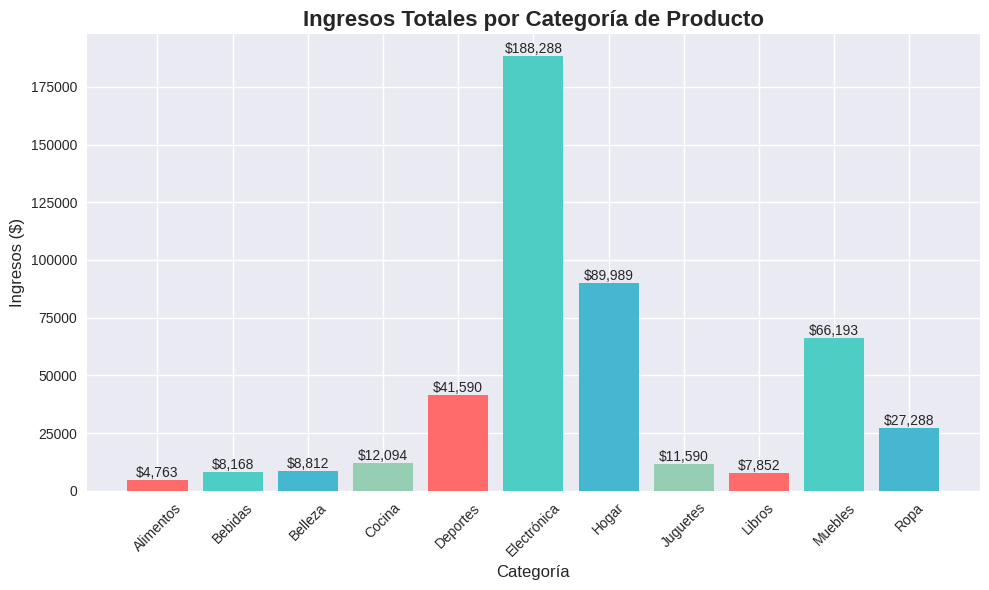

0

In [ ]:
# Gráfica 1: Ventas por categoría
#Consultamos el SQL para obtener las ventas por categoría
query_cat = "SELECT Categoria, SUM(Total_Venta) as Total FROM reporte_ventas_completo GROUP BY Categoria"
df_cat = pd.read_sql_query(query_cat, conn)

# Creamos una gráfica de barras
plt.figure(figsize=(10, 6)) # Le asignamos un tamaño a la gráfica
bars = plt.bar(df_cat['Categoria'], df_cat['Total'], color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
plt.title('Ingresos Totales por Categoría de Producto', fontsize=16, fontweight='bold')
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Ingresos ($)', fontsize=12)
plt.xticks(rotation=45)

# Agregamos valores numéricos en las barras
for bar in bars:
    height = bar.get_height() # Obtenemos el valor de la altura de cada barra
    plt.text(bar.get_x() + bar.get_width()/2., height, # Posicionamos el texto
             f'${height:,.0f}', ha='center', va='bottom') # Asignamos el formato: $, separadores de miles, centramos en horizontal y arriba de la barra

plt.tight_layout() # Ajustamos el diseño para que quepa todo
plt.savefig('data/grafica_ventas_categoria.png', dpi=300, bbox_inches='tight') # Guardamos la imagen
plt.show() # Mostramos la gráfica

# Guardar en Excel
df_cat.to_excel(writer, sheet_name='Ventas_Categoria', index=False) # Guardamos en la hoja de excel
worksheet = writer.sheets['Ventas_Categoria'] # Accedemos a la hoja recien creada
worksheet.insert_image('D2', 'data/grafica_ventas_categoria.png') # Insertamos la imagen creada en la celda D2

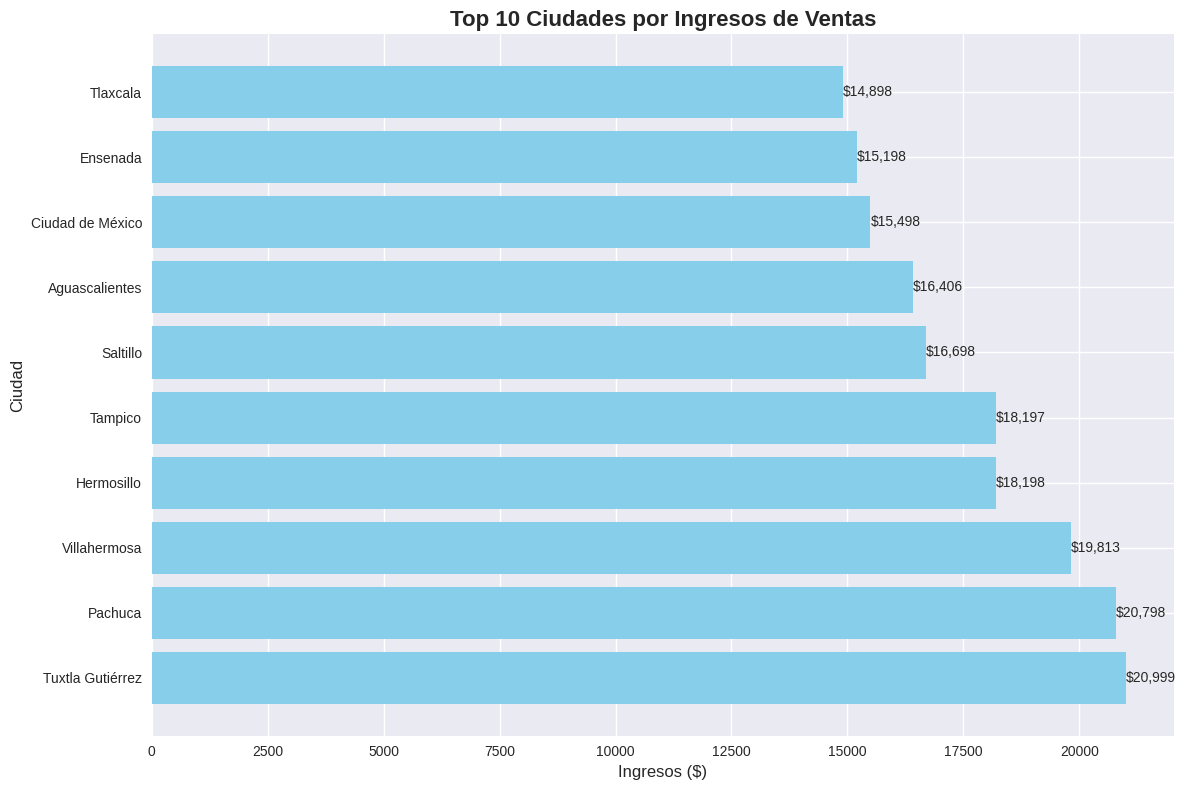

0

In [ ]:
# Gráfica 2: Top 10 ciudades con más ventas
#Consultamos las 10 ciudades con más ventas
query_ciudad = """
SELECT Ciudad, COUNT(*) as Num_Ventas, SUM(Total_Venta) as Total
FROM reporte_ventas_completo
WHERE Ciudad IS NOT NULL  -- Excluye registros sin ciudad
GROUP BY Ciudad           -- Agrupa por ciudad para sumar ventas
ORDER BY Total DESC       -- Ordena de mayor a menor ingreso
LIMIT 10                  -- Solo las 10 mejores ciudades
"""
df_ciudad = pd.read_sql_query(query_ciudad, conn)

# Creamos una gráfica de barras horizontal
plt.figure(figsize=(12, 8)) # Le asignamos el tamaño a la grafica
bars = plt.barh(df_ciudad['Ciudad'], df_ciudad['Total'], color='skyblue') # Ponemos la barras en horizontal
plt.title('Top 10 Ciudades por Ingresos de Ventas', fontsize=16, fontweight='bold')
plt.xlabel('Ingresos ($)', fontsize=12) # En el eje X mostramos el dinero
plt.ylabel('Ciudad', fontsize=12) # En el eje Y mostramos las ciudades

# Agregar valores a lado de cada barras
for i, bar in enumerate(bars):
    width = bar.get_width() # Ponemos el ancho de la barra = valor de ingreso
    plt.text(width, bar.get_y() + bar.get_height()/2., # Lo posicionamos al final de cada barra
             f'${width:,.0f}', ha='left', va='center') # Ocupamos el formato: $, separadores de miles, texto alineado a la izquierda y centrado verticalmente

plt.tight_layout() # Ajustamos el diseño
plt.savefig('data/grafica_ciudades_top.png', dpi=300, bbox_inches='tight') # Guardamo la imagen
plt.show() #Mostramos la grafica

# Guardamos en Excel
df_ciudad.to_excel(writer, sheet_name='Top_Ciudades', index=False) # Ponemos los datos en la hoja de excel
worksheet = writer.sheets['Top_Ciudades'] # Accedemos a la hoja recien creada
worksheet.insert_image('E2', 'data/grafica_ciudades_top.png') # Insertamos la imagen en la celda E2

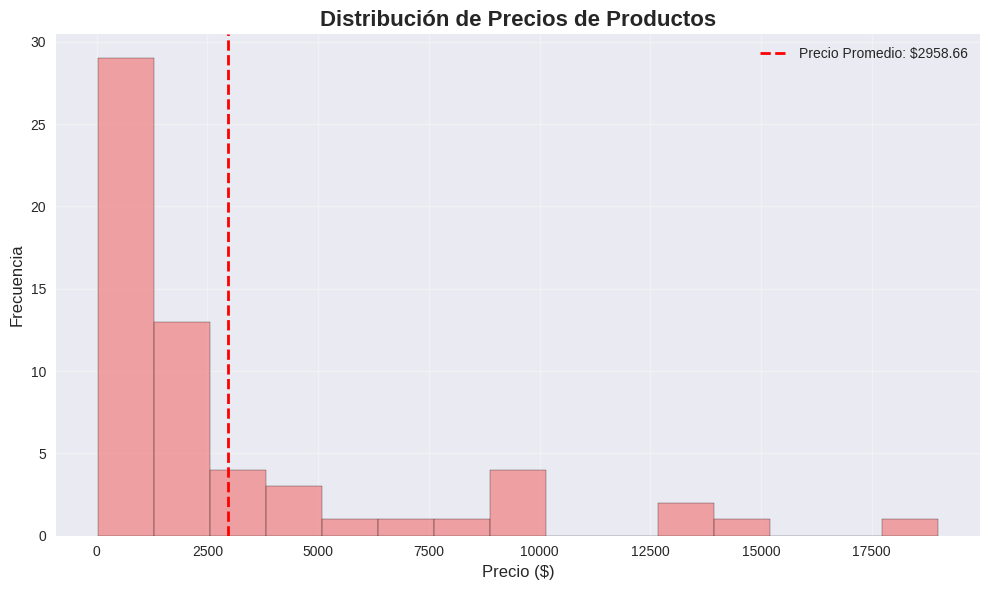

0

In [ ]:
# Gráfica 3: Distribución de precios de productos
# Obtenemos todos los precios sin que se dupliquen
query_precios = "SELECT DISTINCT Nombre_Producto, Precio_Unitario FROM reporte_ventas_completo"
df_precios = pd.read_sql_query(query_precios, conn)

# Creamos histograma de distribución de precios
plt.figure(figsize=(10, 6))
plt.hist(df_precios['Precio_Unitario'], bins=15, color='lightcoral', alpha=0.7, edgecolor='black')
plt.title('Distribución de Precios de Productos', fontsize=16, fontweight='bold')
plt.xlabel('Precio ($)', fontsize=12) # El eje X sera la variable que estamos midiendo
plt.ylabel('Frecuencia', fontsize=12) # El eje Y sera cuantos productos hay en cada rango
plt.grid(True, alpha=0.3)

# Agregar línea de precio promedio
precio_promedio = df_precios['Precio_Unitario'].mean() # Calculamos el promedio
plt.axvline(precio_promedio, color='red', linestyle='--', linewidth=2,
           label=f'Precio Promedio: ${precio_promedio:.2f}')
plt.legend() # Mostramos la leyenda con la linea promedio

plt.tight_layout() # Ajustamos el histograma para que tode se vea
plt.savefig('data/grafica_distribucion_precios.png', dpi=300, bbox_inches='tight')
plt.show() # Mostramos el histograma

# Guardar estadísticas en Excel
stats_precios = df_precios['Precio_Unitario'].describe().to_frame().T # Volvemos el DateFrame en horizontal
stats_precios.to_excel(writer, sheet_name='Estadisticas_Precios', index=False) # Lo guardamos en el excel
worksheet = writer.sheets['Estadisticas_Precios'] # Accedemos a la hoja recien creada
worksheet.insert_image('A5', 'data/grafica_distribucion_precios.png') # Insertamos la imagen en la celda A5

## 8.5. Visualizaciones Geográficas de México

### Mapas de México con Datos de Ventas

In [ ]:
# Importar funciones de mapas de México
import sys
sys.path.append('.')
from funciones_mapas_mexico import (
    cargar_geojson_mexico,
    crear_mapa_base_mexico,
    crear_mapa_coroplético_ventas,
    crear_mapa_ciudades_principales,
    crear_mapa_interactivo_folium,
    guardar_mapa_como_imagen
)

print("CREANDO MAPAS DE MÉXICO CON DATOS DE VENTAS") # Ponemos titulo para la seccion de mapas

CREANDO MAPAS DE MÉXICO CON DATOS DE VENTAS


In [ ]:
# Cargar el archivo GeoJSON de México
ruta_geojson = "/content/admin1.geojson" # Ruta donde tenemos nuestro archivo de mapas
gdf_mexico = cargar_geojson_mexico(ruta_geojson)

# Verificamos si la carga fue exitosa
if gdf_mexico is not None:
    print(f"Archivo GeoJSON cargado exitosamente")
    print(f"Estados/regiones disponibles: {len(gdf_mexico)}") # Ponemos cuantos estados tiene el mapa
else:
    print("Error al cargar el archivo GeoJSON")

 GeoJSON cargado exitosamente: 382 estados/regiones
 Columnas disponibles: ['AREA', 'PERIMETER', 'COV_', 'COV_ID', 'ENTIDAD', 'CAPITAL', 'RASGO_GEOG', 'CVE_EDO', 'geometry']
Archivo GeoJSON cargado exitosamente
Estados/regiones disponibles: 382


In [ ]:
# Crear datos de ventas por región para el mapa
# Simulamos datos regionales basados en los datos existentes
query_regiones = """
SELECT
    CASE
        WHEN Ciudad IN ('Tijuana', 'Mexicali', 'Hermosillo', 'Chihuahua', 'Monterrey', 'Saltillo') THEN 'Norte'

        WHEN Ciudad IN ('Ciudad de México', 'Guadalajara', 'Puebla', 'Querétaro', 'León', 'Aguascalientes', 'Toluca', 'Morelia') THEN 'Centro'

        WHEN Ciudad IN ('Mérida', 'Veracruz', 'Villahermosa', 'Tuxtla Gutiérrez', 'Oaxaca', 'Acapulco') THEN 'Sur'

        ELSE 'other'
    END as region,

    COUNT(*) as num_ventas,           -- Total de transacciones por región
    SUM(Total_Venta) as total_ventas, -- Dinero total generado por región
    AVG(Total_Venta) as promedio_venta -- Ticket promedio por región

FROM reporte_ventas_completo
WHERE Ciudad IS NOT NULL              -- Excluimos ventas sin ciudad registrada
GROUP BY region                       -- Agrupamos por la región que creamos
HAVING region != 'other'              -- Excluimos la categoría "other"
ORDER BY total_ventas DESC            -- Ordenamos de mayor a menor ingreso
"""

# Ejecutamos la consulta y obtenemos los resultados
df_regiones = pd.read_sql_query(query_regiones, conn)
print("DATOS DE VENTAS POR REGIÓN:") # Mostramos los resultados
display(df_regiones)

DATOS DE VENTAS POR REGIÓN:


region  num_ventas  total_ventas  promedio_venta
0  Centro          24      79688.45     3320.352083
1     Sur          18      78212.93     4345.162778
2   Norte          15      55988.97     3732.598000

In [ ]:
print(df_regiones)

   region  num_ventas  total_ventas  promedio_venta
0  Centro          24      79688.45     3320.352083
1     Sur          18      78212.93     4345.162778
2   Norte          15      55988.97     3732.598000


 Mapa guardado como: data/mapa_ventas_regiones_mexico.png


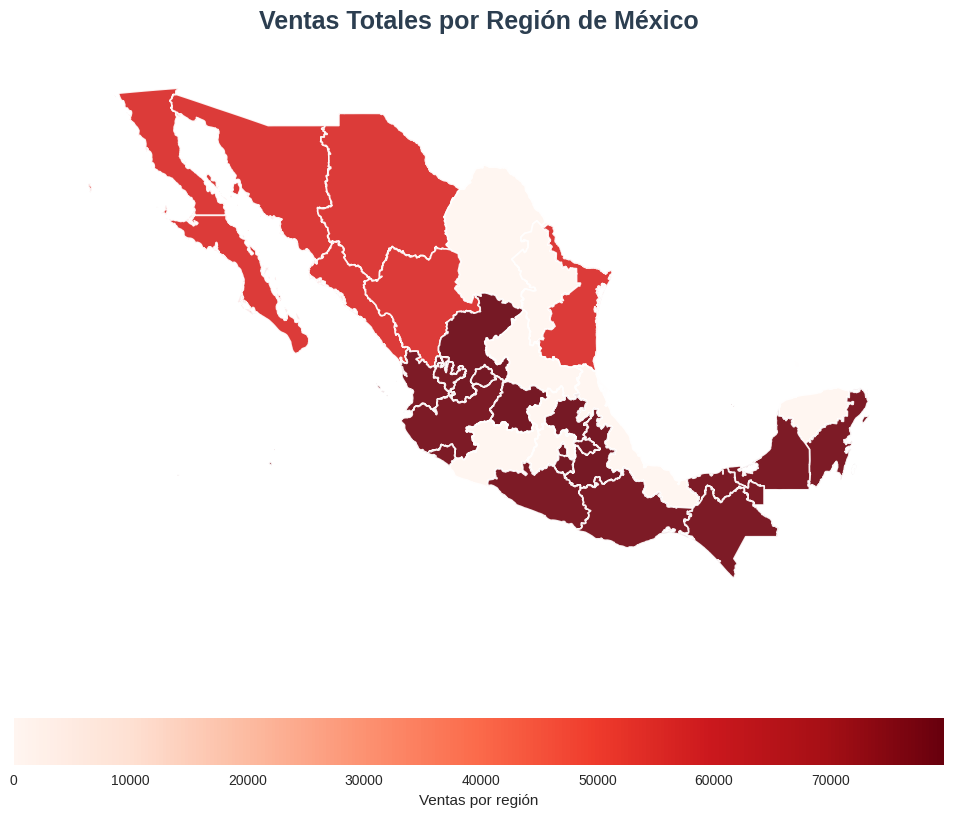

Mapa de ventas por región creado exitosamente


In [ ]:
# Crear mapa coroplético de ventas por región
# Verificamos los datos necesarios para crear el mapa
if gdf_mexico is not None and len(df_regiones) > 0:
    fig, ax = crear_mapa_coroplético_ventas( # Creamos el mapa
        gdf_mexico, # Formas geográficas de México
        df_regiones, # Datos de ventas por región
        'region',
        'total_ventas',
        "Ventas Totales por Región de México",
        cmap='Reds',
        figsize=(15, 10) # Le asignamos el tamaño al mapa
    )

    # Guardar el mapa
    guardar_mapa_como_imagen(fig, 'data/mapa_ventas_regiones_mexico.png')
    plt.show() # Mostramos el mapa

    print("Mapa de ventas por región creado exitosamente")
else:
    print("No se pudo crear el mapa de ventas por región")

 Mapa guardado como: data/mapa_num_ventas_regiones_mexico.png


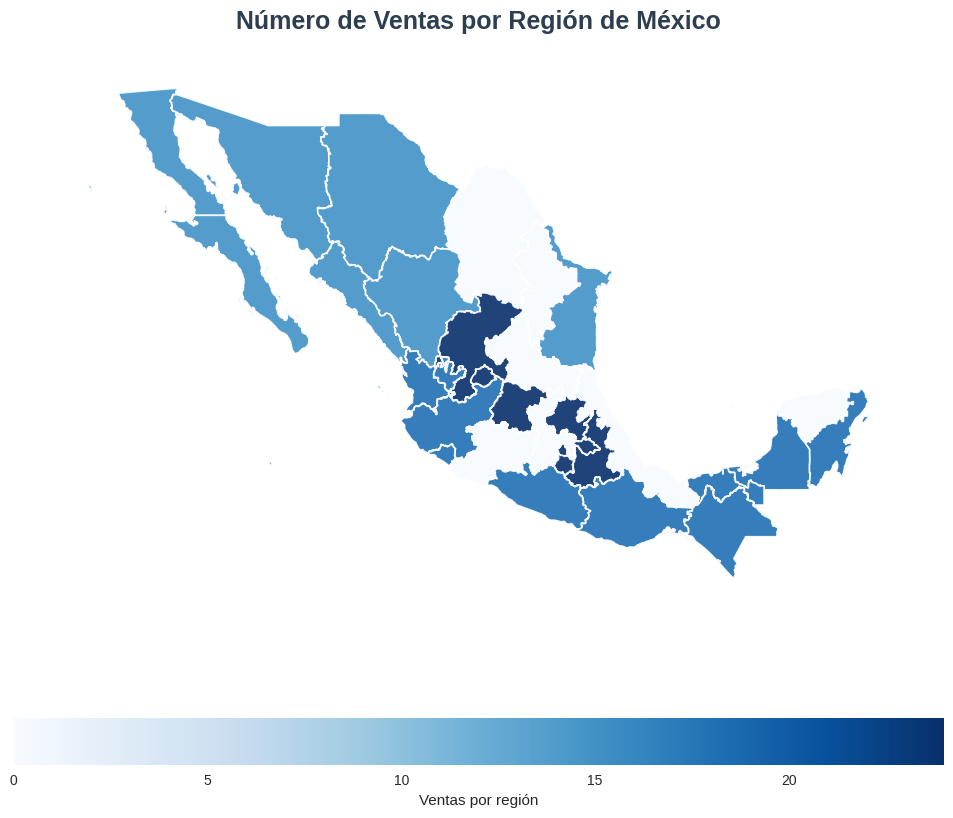

Mapa de número de ventas por región creado exitosamente


In [ ]:
# Crear mapa de número de ventas por región
# Verificamos los datos necesarios para crear el mapa
if gdf_mexico is not None and len(df_regiones) > 0:
    fig, ax = crear_mapa_coroplético_ventas( # Creamos el mapa
        gdf_mexico, # Formas geográficos de México
        df_regiones, # Datos de ventas por región
        'region',
        'num_ventas',
        "Número de Ventas por Región de México",
        cmap='Blues',
        figsize=(15, 10) # Tamaño del mapa
    )

    # Guardar el mapa
    guardar_mapa_como_imagen(fig, 'data/mapa_num_ventas_regiones_mexico.png')
    plt.show() # Mostramos el mapa

    print("Mapa de número de ventas por región creado exitosamente")
else:
    print("No se pudo crear el mapa de número de ventas por región")

 Mapa guardado como: data/mapa_ciudades_principales_mexico.png


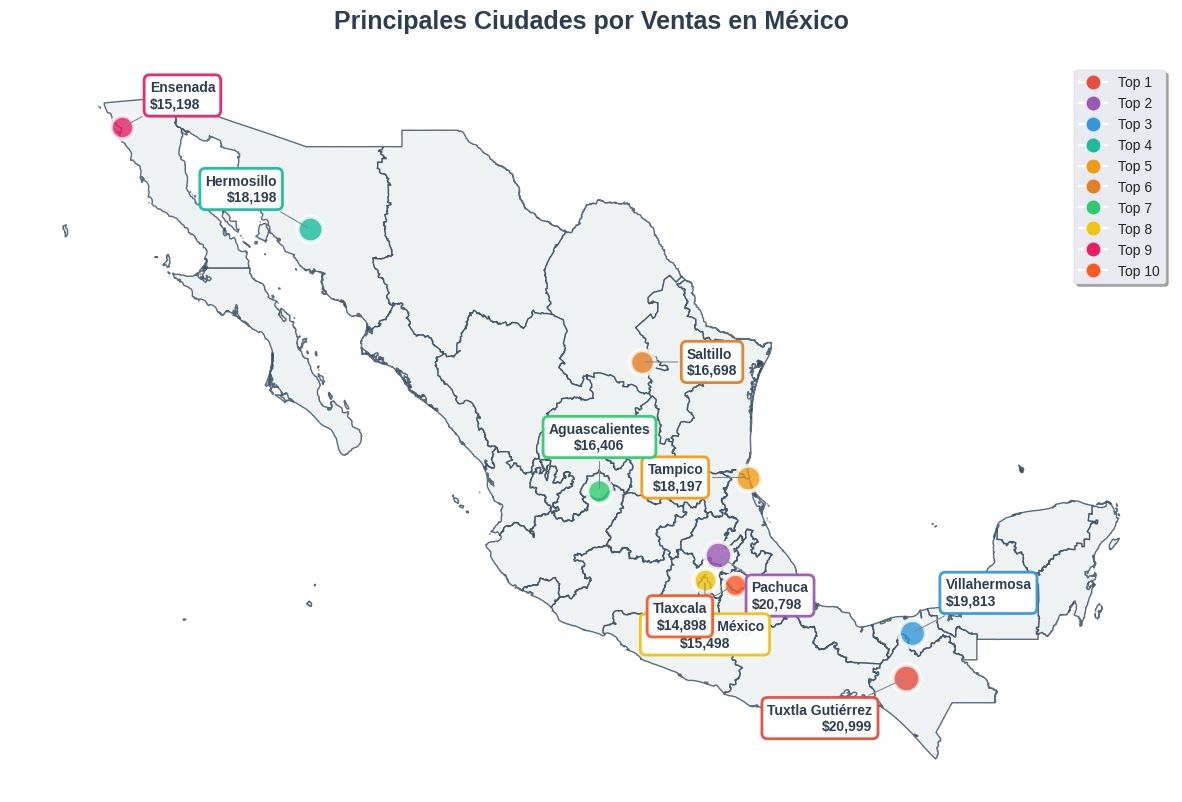

Mapa de ciudades principales creado exitosamente

TOP 10 CIUDADES POR VENTAS:


Ciudad  Num_Ventas  Total_Ventas
0  Tuxtla Gutiérrez           3      20998.97
1           Pachuca           3      20798.49
2      Villahermosa           3      19812.96
3        Hermosillo           3      18197.99
4           Tampico           3      18197.00
5          Saltillo           3      16698.49
6    Aguascalientes           3      16406.00
7  Ciudad de México           3      15498.00
8          Ensenada           3      15197.50
9          Tlaxcala           3      14898.49

In [ ]:
# Crear mapa de ciudades principales con marcadores
query_ciudades_top = """
SELECT
    Ciudad,
    COUNT(*) as Num_Ventas,           -- Total de transacciones por ciudad
    SUM(Total_Venta) as Total_Ventas  -- Monto total generado por ciudad
FROM reporte_ventas_completo
WHERE Ciudad IS NOT NULL              -- Excluir registros sin ciudad
GROUP BY Ciudad                       -- Agrupar por ciudad para consolidar datos
ORDER BY Total_Ventas DESC            -- Ordenar de mayor a menor por ingresos
LIMIT 10                             -- Tomar las 10 ciudades más importantes
"""
# Ejecutamos la consulta y obtenemos los resultados
df_ciudades_top = pd.read_sql_query(query_ciudades_top, conn)
# Verificamos que tenemos los datos para crear el mapa
if gdf_mexico is not None and len(df_ciudades_top) > 0:
    fig, ax = crear_mapa_ciudades_principales(
        gdf_mexico, # Mapa de México
        df_ciudades_top, # Datos de la ciudades
        "Principales Ciudades por Ventas en México",
        figsize=(15, 10), # Tamaño del mapa
        top_n=10 # Mostramos solo las 10 ciudades principales
    )

    # Guardar el mapa
    guardar_mapa_como_imagen(fig, 'data/mapa_ciudades_principales_mexico.png')
    plt.show() # Mostramos el mapa

    print("Mapa de ciudades principales creado exitosamente")
    print("\nTOP 10 CIUDADES POR VENTAS:") # Mostramos la tabla con las 10 ciudades
    display(df_ciudades_top.head(10))
else:
    print("No se pudo crear el mapa de ciudades principales")

In [ ]:
# Ejecuta tu consulta original (por categoría y ciudad)
query_reporte = """
SELECT
    Categoria,
    Ciudad,
    COUNT(*) as Num_Ventas,
    SUM(Cantidad) as Total_Productos_Vendidos,
    SUM(Total_Venta) as Ingresos_Total,
    AVG(Total_Venta) as Promedio_Venta,
    MIN(Total_Venta) as Venta_Minima,
    MAX(Total_Venta) as Venta_Maxima
FROM reporte_ventas_completo
WHERE Nombre_Cliente IS NOT NULL
  AND Nombre_Producto IS NOT NULL
GROUP BY Categoria, Ciudad
ORDER BY Ingresos_Total DESC
"""
df_reporte_resumen = pd.read_sql_query(query_reporte, conn)

# Mapeo ciudad -> ENTIDAD (estado) usando un dicc
ciudad_a_entidad = {
    "Ciudad de México": "CIUDAD DE MÉXICO", "Guadalajara": "JALISCO", "Monterrey": "NUEVO LEÓN",
    "Puebla": "PUEBLA", "Tijuana": "BAJA CALIFORNIA", "León": "GUANAJUATO", "Cancún": "QUINTANA ROO",
    "Querétaro": "QUERÉTARO", "Mérida": "YUCATÁN", "Aguascalientes": "AGUASCALIENTES", "Hermosillo": "SONORA",
    "Morelia": "MICHOACÁN", "Toluca": "MÉXICO", "Chihuahua": "CHIHUAHUA", "Veracruz": "VERACRUZ",
    "Tampico": "TAMAULIPAS", "Culiacán": "SINALOA", "Mazatlán": "SINALOA", "Acapulco": "GUERRERO",
    "Saltillo": "COAHUILA", "Durango": "DURANGO", "Campeche": "CAMPECHE", "Oaxaca": "OAXACA",
    "Zacatecas": "ZACATECAS", "Colima": "COLIMA", "Tlaxcala": "TLAXCALA", "Ciudad Juárez": "CHIHUAHUA",
    "Villahermosa": "TABASCO", "Chetumal": "QUINTANA ROO", "La Paz": "BAJA CALIFORNIA SUR", "Torreón": "COAHUILA",
    "Celaya": "GUANAJUATO", "Irapuato": "GUANAJUATO", "Manzanillo": "COLIMA", "Ensenada": "BAJA CALIFORNIA",
    "Ciudad Obregón": "SONORA", "Nogales": "SONORA", "Los Mochis": "SINALOA", "Matamoros": "TAMAULIPAS",
    "Reynosa": "TAMAULIPAS", "Coatzacoalcos": "VERACRUZ", "Pachuca": "HIDALGO", "Cuernavaca": "MORELOS",
    "Tepic": "NAYARIT", "Tuxtla Gutiérrez": "CHIAPAS", "Xalapa": "VERACRUZ", "San Luis Potosí": "SAN LUIS POTOSÍ",
    "Gómez Palacio": "DURANGO", "Uruapan": "MICHOACÁN", "Ciudad Victoria": "TAMAULIPAS"
}

# Construir tabla ciudad -> ENTIDAD y unir al reporte
df_ciudad_entidad = df_clientes.assign(
    ENTIDAD=df_clientes["Ciudad"].map(ciudad_a_entidad)
).drop_duplicates(subset=["Ciudad"])

df_reporte_estado = df_reporte_resumen.merge(df_ciudad_entidad, on="Ciudad", how="left")
df_reporte_estado["ENTIDAD"] = df_reporte_estado["ENTIDAD"].fillna("N/A")

# Agregar por estado (ventas totales y métricas asociadas)
df_ventas_por_estado = df_reporte_estado.groupby("ENTIDAD", as_index=False).agg({
    "Num_Ventas": "sum",
    "Total_Productos_Vendidos": "sum",
    "Ingresos_Total": "sum",
    "Promedio_Venta": "mean",     # promedio de promedios por ciudad
    "Venta_Minima": "min",
    "Venta_Maxima": "max"
}).sort_values("Ingresos_Total", ascending=False)

print("VENTAS TOTALES POR ESTADO:")
display(df_ventas_por_estado)

# Guardar CSV
os.makedirs("data", exist_ok=True)
out_csv = "data/reporte_ventas_por_estado.csv"
df_ventas_por_estado.to_csv(out_csv, index=False)
print(f"\nReporte guardado en: {out_csv}")

# Opcional: lista de ciudades sin mapeo
faltantes = sorted(set(df_reporte_estado.loc[df_reporte_estado["ENTIDAD"].eq("N/A"), "Ciudad"]))
if faltantes:
    print("Ciudades sin estado mapeado:", faltantes)

VENTAS TOTALES POR ESTADO:


ENTIDAD  Num_Ventas  Total_Productos_Vendidos  Ingresos_Total  \
27           TAMAULIPAS          12                        13        38989.24   
25               SONORA           9                        17        36298.97   
1       BAJA CALIFORNIA           6                         7        29495.49   
29             VERACRUZ           9                        18        27648.95   
10           GUANAJUATO           9                        13        25371.49   
14            MICHOACÁN           6                        15        22891.49   
4               CHIAPAS           3                         4        20998.97   
12              HIDALGO           3                         3        20798.49   
7              COAHUILA           6                        20        20261.49   
26              TABASCO           3                        10        19812.96   
9               DURANGO           6                         6        18097.23   
0        AGUASCALIENTES           3                        26        16406.00   
6      CIUDAD DE MÉXICO           3                         3        15498.00   
28             TLAXCALA           3                         3        14898.49   
15              MORELOS           3                         3        14298.49   
24              SINALOA           9                        12        12891.50   
23      SAN LUIS POTOSÍ           3                         4        11897.50   
20               PUEBLA           3                         5        11196.00   
30              YUCATÁN           3                         9        11131.50   
5             CHIHUAHUA           6                        30         9896.48   
22         QUINTANA ROO           6                        15         9756.89   
2   BAJA CALIFORNIA SUR           3                         3         9498.49   
11             GUERRERO           3                         3         8597.50   
8                COLIMA           6                        22         7901.43   
16               MÉXICO           3                        14         7698.00   
19               OAXACA           3                         6         4614.00   
17              NAYARIT           3                         5         4398.72   
18           NUEVO LEÓN           3                         3         4398.00   
13              JALISCO           3                         4         4197.98   
3              CAMPECHE           3                        10         2882.50   
31            ZACATECAS           3                         4         2867.00   
21            QUERÉTARO           3                         5         1037.98   

    Promedio_Venta  Venta_Minima  Venta_Maxima  
27     2804.124000        598.00      14999.00  
25     4033.218889        477.00      12999.00  
1      5679.248000        599.00      12999.00  
29     3072.105556        459.50       8999.00  
10     2996.468125        299.50       8999.00  
14     3588.349000        899.00       8999.50  
4      6999.656667        799.00      18999.99  
12     6932.830000        899.00      18999.99  
7      2422.399000        399.50      14999.00  
26     6604.320000        213.00      18999.99  
9      2812.027500        899.99       7999.99  
0      5468.666667        459.00      14999.00  
6      5166.000000        299.50      12999.00  
28     4966.163333       1299.00       8999.50  
15     4766.163333        699.99       8999.00  
24     1569.062500        299.00       6599.00  
23     3965.833333       1299.00       8999.50  
20     3732.000000        897.00       8999.50  
30     3710.500000        534.00       8999.50  
5      1649.413333        598.00       5599.99  
22     1626.148333        459.90       3599.50  
2      2474.497500        399.50       5599.99  
11     3299.125000       1599.00       4599.00  
8      1316.905000        229.95       3499.00  
16     2566.000000        300.00       6599.00  
19     1538.000000        897.00       2799.00  
17     1466.240000 


Reporte guardado en: data/reporte_ventas_por_estado.csv


In [ ]:
m, ruta_html = crear_mapa_interactivo_folium(
    gdf_mexico,
    datos_ventas=df_ventas_por_estado,
    columna_region='ENTIDAD',
    columna_valor='Ingresos_Total',
    columna_num_ventas='Num_Ventas',
    color_map='pastel_soft',
    add_layers=True
)#hacer el mapa dinámico html

In [ ]:
#ejecutar la funcion para el mapa dinamicooo
m, ruta_html = crear_mapa_interactivo_folium(
    gdf_mexico,
    datos_ventas=df_ventas_por_estado,
    columna_region='ENTIDAD',
    columna_valor='Ingresos_Total',
    columna_num_ventas='Num_Ventas',
    add_layers=True
)

In [ ]:
from IPython.display import display
display(m)  #mostrar el mapa dinámico de verdad no bait

In [ ]:
# Análisis geográfico de ventas
print("ANÁLISIS GEOGRÁFICO DE VENTAS:")

if len(df_regiones) > 0:
    # Región con mayores ventas
    region_top = df_regiones.loc[df_regiones['total_ventas'].idxmax()]
    print(f"Región con mayores ventas: {region_top['region']}")
    print(f"   Total de ventas: ${region_top['total_ventas']:,.2f}")
    print(f"   Número de ventas: {region_top['num_ventas']}")
    print(f"   Promedio por venta: ${region_top['promedio_venta']:,.2f}")

    # Región con mayor número de ventas
    region_mas_ventas = df_regiones.loc[df_regiones['num_ventas'].idxmax()]
    print(f"\nRegión con más transacciones: {region_mas_ventas['region']}")
    print(f"   Número de ventas: {region_mas_ventas['num_ventas']}")

    # Región con mayor promedio por venta
    region_mejor_promedio = df_regiones.loc[df_regiones['promedio_venta'].idxmax()]
    print(f"\nRegión con mayor promedio por venta: {region_mejor_promedio['region']}")
    print(f"   Promedio por venta: ${region_mejor_promedio['promedio_venta']:,.2f}")

    # Distribución porcentual
    total_general = df_regiones['total_ventas'].sum()
    print(f"\nDISTRIBUCIÓN PORCENTUAL DE VENTAS:")
    for _, row in df_regiones.iterrows():
        porcentaje = (row['total_ventas'] / total_general) * 100
        print(f"   {row['region']}: {porcentaje:.1f}% (${row['total_ventas']:,.2f})")

print("\nAnalisis territorial listo")

ANÁLISIS GEOGRÁFICO DE VENTAS:
Región con mayores ventas: Centro
   Total de ventas: $79,688.45
   Número de ventas: 24
   Promedio por venta: $3,320.35

Región con más transacciones: Centro
   Número de ventas: 24

Región con mayor promedio por venta: Sur
   Promedio por venta: $4,345.16

DISTRIBUCIÓN PORCENTUAL DE VENTAS:
   Centro: 37.3% ($79,688.45)
   Sur: 36.6% ($78,212.93)
   Norte: 26.2% ($55,988.97)

Analisis territorial listo


## 9. Resumen de Resultados y Estadísticas

In [ ]:
# Resumen general de la base de datos
print("RESUMEN GENERAL DE LA BASE DE DATOS:")

# Estadísticas generales
cursor.execute("SELECT COUNT(*) FROM clientes")
total_clientes = cursor.fetchone()[0]

cursor.execute("SELECT COUNT(*) FROM productos")
total_productos = cursor.fetchone()[0]

cursor.execute("SELECT COUNT(*) FROM ventas")
total_ventas = cursor.fetchone()[0]

cursor.execute("SELECT SUM(Total_Venta) FROM reporte_ventas_completo")
ingresos_totales = cursor.fetchone()[0]

cursor.execute("SELECT AVG(Total_Venta) FROM reporte_ventas_completo")
venta_promedio = cursor.fetchone()[0]

print(f"   -Total de clientes: {total_clientes}")
print(f"   -Total de productos: {total_productos}")
print(f"   -Total de ventas: {total_ventas}")
print(f"   -Ingresos totales: ${ingresos_totales:,.2f}")
print(f"   -Venta promedio: ${venta_promedio:,.2f}")

# Top productos
query_top_productos = """
SELECT Nombre_Producto, COUNT(*) as Ventas, SUM(Total_Venta) as Ingresos
FROM reporte_ventas_completo
GROUP BY Nombre_Producto
ORDER BY Ingresos DESC
LIMIT 5
"""

df_top_productos = pd.read_sql_query(query_top_productos, conn)
print("\nTOP 5 PRODUCTOS POR INGRESOS:")
display(df_top_productos)

# Top clientes
query_top_clientes = """
SELECT Nombre_Cliente, Ciudad, COUNT(*) as Compras, SUM(Total_Venta) as Total_Gastado
FROM reporte_ventas_completo
WHERE Nombre_Cliente IS NOT NULL
GROUP BY Nombre_Cliente, Ciudad
ORDER BY Total_Gastado DESC
LIMIT 5
"""

df_top_clientes = pd.read_sql_query(query_top_clientes, conn)
print("\nTOP 5 CLIENTES POR GASTO:")
display(df_top_clientes)

RESUMEN GENERAL DE LA BASE DE DATOS:
   -Total de clientes: 50
   -Total de productos: 60
   -Total de ventas: 150
   -Ingresos totales: $466,627.22
   -Venta promedio: $3,110.85

TOP 5 PRODUCTOS POR INGRESOS:


Nombre_Producto  Ventas  Ingresos
0        Laptop Gamer X1       3  56999.97
1        Televisor 55 4K       3  44997.00
2  Smartphone Galaxy A55       3  26998.50
3      Bicicleta Montaña       3  26997.00
4          Sofá 3 Plazas       2  25998.00


TOP 5 CLIENTES POR GASTO:


Nombre_Cliente            Ciudad  Compras  Total_Gastado
0  Yolanda Rangel  Tuxtla Gutiérrez        3       20998.97
1   Ramón Delgado           Pachuca        3       20798.49
2    Sergio Rojas      Villahermosa        3       19812.96
3   Sofía Mendoza        Hermosillo        3       18197.99
4  Ricardo Ortega           Tampico        3       18197.00

## 10. Conclusiones

### Análisis de los Resultados Obtenidos

In [ ]:
# Insights del negocio
print("\n  INSIGHTS DEL NEGOCIO:")

# Categoría más rentable
query_cat_rentable = """
SELECT Categoria, SUM(Total_Venta) as Total, COUNT(*) as Ventas
FROM reporte_ventas_completo
GROUP BY Categoria
ORDER BY Total DESC
LIMIT 1
"""
cat_rentable = pd.read_sql_query(query_cat_rentable, conn)
if len(cat_rentable) > 0:
    print(f"<> Categoría más rentable: {cat_rentable.iloc[0]['Categoria']} (${cat_rentable.iloc[0]['Total']:,.2f})")

# Ciudad con más ventas
query_ciudad_top = """
SELECT Ciudad, COUNT(*) as Ventas, SUM(Total_Venta) as Total
FROM reporte_ventas_completo
WHERE Ciudad IS NOT NULL
GROUP BY Ciudad
ORDER BY Total DESC
LIMIT 1
"""
ciudad_top = pd.read_sql_query(query_ciudad_top, conn)
if len(ciudad_top) > 0:
    print(f"<> Ciudad con mayores ingresos: {ciudad_top.iloc[0]['Ciudad']} (${ciudad_top.iloc[0]['Total']:,.2f})")

# Análisis de precios usando unas consultas de sql
query_precio_stats = "SELECT AVG(Precio_Unitario) as Promedio, MIN(Precio_Unitario) as Minimo, MAX(Precio_Unitario) as Maximo FROM reporte_ventas_completo"
precio_stats = pd.read_sql_query(query_precio_stats, conn)
if len(precio_stats) > 0:
    print(f"<> Rango de precios: ${precio_stats.iloc[0]['Minimo']:,.2f} - ${precio_stats.iloc[0]['Maximo']:,.2f}")
    print(f"<> Precio promedio: ${precio_stats.iloc[0]['Promedio']:,.2f}")
#Recomendaciones para mejorar el negocio cosas de BI
print("\n  RECOMENDACIONES:")
print(" Enfocar marketing en la categoría más rentable, la cual del análisis concluimos que es Electrónica")
print(" Expandir operaciones en las ciudades con mayor potencial, siendo la de mayor ingreso Tuxtla Gutiérrez")
print(" Analizar productos de bajo rendimiento para optimización")

print("\n  ARCHIVOS GENERADOS:")
archivos_generados = [
    'data/tarea_ii_database.db',
    'data/g1.xlsx',
    'data/reporte_ventas_categoria_ciudad.csv',
    'data/clientes_gmail.csv',
    'data/ventas_mayores_5000.csv',
    'data/productos_menores_1000.csv',
    'data/ventas_electronica.csv'
]



  INSIGHTS DEL NEGOCIO:
<> Categoría más rentable: Electrónica ($188,287.68)
<> Ciudad con mayores ingresos: Tuxtla Gutiérrez ($20,998.97)
<> Rango de precios: $25.00 - $18,999.99
<> Precio promedio: $2,993.13

  RECOMENDACIONES:
 Enfocar marketing en la categoría más rentable, la cual del análisis concluimos que es Electrónica
 Expandir operaciones en las ciudades con mayor potencial, siendo la de mayor ingreso Tuxtla Gutiérrez
 Analizar productos de bajo rendimiento para optimización

  ARCHIVOS GENERADOS:


In [ ]:
#meter los df importates al excel
df_electronica.to_excel(writer, sheet_name='Ventas_electronica', index=False)
df_productos_baratos.to_excel(writer, sheet_name='Productos_menores_$1000', index=False)
df_gmail.to_excel(writer, sheet_name='Clientes_gmail', index=False)
df_ventas_por_estado.to_excel(writer, sheet_name='Ventas_por_estado', index=False)
df_reporte_resumen.to_excel(writer, sheet_name='Ventas_por_categoria_ciudad', index=False)

workbook = writer.book
ws_elec = writer.sheets['Ventas_electronica']
ws_prod = writer.sheets['Productos_menores_$1000']
ws_gmail = writer.sheets['Clientes_gmail']
ws_estado = writer.sheets['Ventas_por_estado']
ws_resumen = writer.sheets['Ventas_por_categoria_ciudad']

In [ ]:
# Cerrar el ExcelWriter
writer.close()

In [ ]:
# Cerrar conexión a la base de datos
conn.close()
print("\nConexión a base de datos cerrada")


Conexión a base de datos cerrada


In [ ]:
import shutil
from google.colab import files

# Comprimir la carpeta 'data' en un archivo ZIP
shutil.make_archive('data', 'zip', 'data')

# Descargar el archivo comprimido
files.download('data.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**CONCLUSIÓN**

Este código implementa un sistema completo de análisis de ventas que transforma datos comerciales en información valiosa para la toma de decisiones. Comienza descargando automáticamente los archivos necesarios desde internet, incluyendo información de clientes, productos y ventas, así como mapas geográficos de México. Luego organiza todos estos datos en una base de datos estructurada donde realizamos consultas avanzadas para descubrir patrones y tendencias del negocio.

Esto nos permite identificar qué productos son los más vendidos, qué clientes generan mayores ingresos y en qué regiones del país se concentra la actividad comercial. Utilizando operadores de comparación para filtrar información específica, como clientes con correos de Gmail, ventas de alto valor o productos económicos, generando reportes detallados con estadísticas descriptivas que ayudan a entender el comportamiento del mercado.

Una de las capacidades más destacadas es la generación de visualizaciones profesionales que realizamos, incluyendo gráficas de barras, histogramas de precios y especialmente mapas interactivos que muestran la distribución geográfica de las ventas. Estos mapas permiten ver claramente qué zonas del país son más rentables y qué ciudades tienen mayor potencial de crecimiento, combinando datos numéricos con información espacial, como lo vemos en la parte de insights del negocio.

Finalmente, el código consolida todos los hallazgos en reportes ejecutivos que incluyen conclusiones prácticas y recomendaciones accionables, como enfocar esfuerzos de marketing en las categorías más rentables o expandir operaciones en ciudades con alto potencial. Todo el proceso está automatizado, desde la descarga inicial de datos hasta la generación de archivos listos para ser utilizados por directivos y equipos comerciales.

### SAS


data clientes;
    infile datalines dsd dlm=',' firstobs=2 truncover;
    length Nombre $50 Email $80 Ciudad $40 Telefono $14;
    input ID_Cliente : 8.
          Nombre : $50.
          Email : $80.
          Telefono : $14.
          Ciudad : $40.;
datalines;
ID_Cliente,Nombre,Email,Telefono,Ciudad
1,Ana García,anita.garcia.95@gmail.com,5512345678,Ciudad de México
2,Carlos López,lobo_carlos_lopez@hotmail.com,3312345678,Guadalajara
3,María Hernández,mary.hdz.mty@outlook.com,8112345678,Monterrey
4,Juan Martínez,juancho.martinez.94@yahoo.com.mx,2221234567,Puebla
5,Laura Díaz,laurita.diaz.rockera@live.com.mx,6641234567,Tijuana
6,Rodrigo Silva,rodri.silva.corredor@icloud.com,4771234567,León
7,Isabel Flores,isita.flores.88@gmail.com,9981234567,Cancún
8,Miguel Torres,mike.torres.qro@hotmail.com,4421234567,Querétaro
9,Elena Castro,ele.castro.yucatan@outlook.es,9991234567,Mérida
10,Diego Ruiz,dieguito.ruiz.gamer@gmail.com,4491234567,Aguascalientes
11,Sofía Mendoza,sofimendoza.7@gmail.com,6621234567,Hermosillo
12,Pablo Vargas,elvargas.morelia@yahoo.com,4431234567,Morelia
13,Adriana Romero,adri.romero.toluca@live.com,7221234567,Toluca
14,Fernando Morales,fer.morales.chih@hotmail.com,6141234567,Chihuahua
15,Carolina Soto,carosoto.veracruz@outlook.com,2291234567,Veracruz
16,Ricardo Ortega,ricky.ortega.tampico@gmail.com,8331234567,Tampico
17,Patricia Reyes,paty.reyes.culichi@yahoo.com.mx,6671234567,Culiacán
18,Oscar Guzmán,ozzy.guzman.maz@gmail.com,6691234567,Mazatlán
19,Gabriela Núñez,gaby.nunez.aca@hotmail.com,7441234567,Acapulco
20,José Campos,pepe.campos.saltillo@live.com.mx,8441234567,Saltillo
21,Daniela Ríos,dany.rios.dgo@icloud.com,6181234567,Durango
22,Arturo Medina,art.medina.campeche@outlook.com,9811234567,Campeche
23,Verónica Cruz,vero.cruz.oax@gmail.com,9511234567,Oaxaca
24,Roberto Salazar,beto.salazar.zac@yahoo.com,4921234567,Zacatecas
25,Liliana Paredes,lili.paredes.colima@hotmail.com,3121234567,Colima
26,Eduardo León,eduardo.leon.tlax@live.com,2461234567,Tlaxcala
27,Brenda Mora,bren.mora.juarez@gmail.com,6561234567,Ciudad Juárez
28,Sergio Rojas,checo.rojas.villa@outlook.es,9931234567,Villahermosa
29,Natalia Vega,nata.vega.chetumal@icloud.com,9831234567,Chetumal
30,Francisco Méndez,pancho.mendez.lapaz@yahoo.com.mx,6121234567,La Paz
31,Claudia Herrera,clau.herrera.torreon@hotmail.com,8711234567,Torreón
32,Antonio Luna,tono.luna.celaya@gmail.com,4611234567,Celaya
33,Mónica Cervantes,moni.cervantes.irapuato@outlook.com,4621234567,Irapuato
34,Raúl Espinoza,ruly.espinoza.manzanillo@live.com,3141234567,Manzanillo
35,Teresa Contreras,teresita.contreras.ensenada@icloud.com,6461234567,Ensenada
36,Javier Ponce,javo.ponce.obregon@gmail.com,6441234567,Ciudad Obregón
37,Gloria Miranda,glo.miranda.nogales@hotmail.com,6311234567,Nogales
38,Manuel Santana,manu.santana.mochis@yahoo.com.mx,6681234567,Los Mochis
39,Alejandra Bravo,ale.bravo.matamoros@outlook.com,8681234567,Matamoros
40,Alberto Valencia,beto.valencia.reynosa@live.com,8991234567,Reynosa
41,Lucia Zamora,lulu.zamora.coatza@gmail.com,9211234567,Coatzacoalcos
42,Ramón Delgado,ramon.delgado.pachuca@hotmail.com,7711234567,Pachuca
43,Silvia Navarro,sil.navarro.cuerna@icloud.com,7771234567,Cuernavaca
44,Héctor Márquez,hector.marquez.tepic@outlook.es,3111234567,Tepic
45,Yolanda Rangel,yory.rangel.tuxtla@yahoo.com,9611234567,Tuxtla Gutiérrez
46,Víctor Correa,vic.correa.xalapa@gmail.com,2281234567,Xalapa
47,Olga Serrano,olga.serrano.slp@hotmail.com,4441234567,San Luis Potosí
48,Rubén Vázquez,ruben.vazquez.gomez@live.com.mx,8711234567,Gómez Palacio
49,Angélica Peña,angie.pena.urua@outlook.com,4521234567,Uruapan
50,Marcos Cordero,marcos.cordero.victoria@gmail.com,8341234567,Ciudad Victoria
;
run;

data productos;
    infile datalines dsd dlm=',' firstobs=2 truncover;
    length Nombre_Producto $80 Categoria $30;
    input ID_Producto : 8.
          Nombre_Producto : $80.
          Categoria : $30.
          Precio : best32.
          Stock : 8.;
datalines;
ID_Producto,Nombre_Producto,Categoria,Precio,Stock
1,Laptop Gamer X1,Electrónica,18999.99,25
2,Smartphone Galaxy A55,Electrónica,8999.50,40
3,Tablet Pro 10,Electrónica,6599.00,30
4,Audífonos Inalámbricos,Electrónica,1299.99,60
5,Smartwatch FitPlus,Electrónica,2499.75,35
6,Cafetera Express,Hogar,3499.00,20
7,Batidora Profesional,Hogar,1899.50,28
8,Licuadora 2L,Hogar,899.99,45
9,Microndas Digital,Hogar,2799.00,15
10,Aspiradora Robot,Hogar,5599.99,12
11,Zapatos Deportivos,Ropa,1299.00,50
12,Jeans Slim Fit,Ropa,799.50,75
13,Camisa Formal,Ropa,599.99,60
14,Vestido Casual,Ropa,899.00,40
15,Chamarra de Piel,Ropa,4599.00,18
16,Pantalón Deportivo,Ropa,649.50,55
17,Libro "El Principito",Libros,299.00,100
18,Novela Best Seller,Libros,459.50,80
19,Cuaderno Profesional,Libros,199.99,120
20,Set de Plumas,Libros,149.50,200
21,Pelota de Fútbol,Deportes,899.00,30
22,Raqueta de Tenis,Deportes,2199.50,25
23,Bicicleta Montaña,Deportes,8999.00,8
24,Tenis Running,Deportes,1799.00,22
25,Mochila Camping,Deportes,1299.50,35
26,Sartén Antiadherente,Cocina,699.99,40
27,Juego de Cuchillos,Cocina,1599.00,25
28,Olla Express,Cocina,2399.50,18
29,Tostador Digital,Cocina,899.00,30
30,Refrigerador 14p,Hogar,12999.00,5
31,Lavadora Automática,Hogar,8999.50,7
32,Televisor 55 4K,Electrónica,14999.00,10
33,Consola Videojuegos,Electrónica,7999.99,15
34,Videojuego FIFA 25,Electrónica,1399.00,40
35,Cámara Digital,Electrónica,4599.50,20
36,Silla Oficina,Muebles,2899.00,15
37,Escritorio Ejecutivo,Muebles,4599.99,12
38,Sofá 3 Plazas,Muebles,12999.00,6
39,Mesa Centro,Muebles,3599.50,10
40,Cama Matrimonial,Muebles,8999.00,8
41,Shampoo Anticaída,Belleza,299.50,80
42,Crema Facial,Belleza,459.00,65
43,Perfume Elegante,Belleza,1299.00,25
44,Maquillaje Profesional,Belleza,899.50,30
45,Cepillo Cabello,Belleza,199.99,100
46,Juguete Educativo,Juguetes,599.00,45
47,Peluche Grande,Juguetes,399.50,60
48,Set Construcción,Juguetes,1299.00,25
49,Pista de Carros,Juguetes,1899.50,18
50,Muñeca Interactiva,Juguetes,799.00,35
51,Aceite Oliva Extra,Alimentos,189.50,90
52,Arroz Integral,Alimentos,45.99,150
53,Café Gourmet,Alimentos,299.00,70
54,Galletas Integrales,Alimentos,89.50,120
55,Miel Natural,Alimentos,159.00,85
56,Vino Tinto,Bebidas,459.00,50
57,Jugo Natural,Bebidas,39.50,200
58,Cerveza Artesanal,Bebidas,89.00,100
59,Agua Mineral,Bebidas,25.00,300
60,Refresco Cola,Bebidas,35.50,180
;
run;

data ventas_raw;
    infile datalines dsd dlm=',' firstobs=2 truncover;
    length Fecha $10;
    input ID_Venta : 8.
          ID_Cliente : 8.
          ID_Producto : 8.
          Fecha : $10.
          Cantidad : 8.
          Total : best32.;
datalines;
ID_Venta,ID_Cliente,ID_Producto,Fecha,Cantidad,Total
1,15,23,2024-01-05,1,8999.00
2,8,45,2024-01-07,2,399.98
3,22,12,2024-01-08,1,799.50
4,37,56,2024-01-10,3,1377.00
5,3,7,2024-01-12,1,1899.50
6,29,34,2024-01-14,1,1399.00
7,41,19,2024-01-15,5,999.95
8,12,8,2024-01-16,1,899.99
9,5,41,2024-01-18,2,599.00
10,18,29,2024-01-19,1,899.00
11,33,15,2024-01-20,1,4599.00
12,47,2,2024-01-22,1,8999.50
13,9,50,2024-01-23,2,1598.00
14,26,37,2024-01-25,1,4599.99
15,44,11,2024-01-26,1,1299.00
16,31,58,2024-01-28,12,1068.00
17,2,21,2024-01-30,1,899.00
18,39,44,2024-02-01,1,899.50
19,16,32,2024-02-03,1,14999.00
20,48,5,2024-02-05,1,2499.75
21,23,17,2024-02-06,3,897.00
22,7,39,2024-02-08,1,3599.50
23,35,25,2024-02-10,1,1299.50
24,50,9,2024-02-12,1,2799.00
25,14,53,2024-02-14,2,598.00
26,42,1,2024-02-16,1,18999.99
27,28,60,2024-02-18,6,213.00
28,11,46,2024-02-20,1,599.00
29,45,13,2024-02-22,2,1199.98
30,6,54,2024-02-24,4,358.00
31,19,28,2024-02-26,1,2399.50
32,32,35,2024-02-28,1,4599.50
33,49,20,2024-03-01,10,1495.00
34,27,4,2024-03-03,1,1299.99
35,10,57,2024-03-05,24,948.00
36,38,14,2024-03-07,1,899.00
37,21,48,2024-03-09,1,1299.00
38,4,31,2024-03-11,1,8999.50
39,46,22,2024-03-13,1,2199.50
40,30,10,2024-03-15,1,5599.99
41,13,59,2024-03-17,12,300.00
42,40,3,2024-03-19,1,6599.00
43,25,52,2024-03-21,5,229.95
44,1,38,2024-03-23,1,12999.00
45,43,26,2024-03-25,1,699.99
46,36,55,2024-03-27,3,477.00
47,20,47,2024-03-29,1,399.50
48,34,6,2024-03-31,1,3499.00
49,17,51,2024-04-02,2,379.00
50,24,16,2024-04-04,1,649.50
51,15,18,2024-04-06,1,459.50
52,8,42,2024-04-08,1,459.00
53,22,24,2024-04-10,1,1799.00
54,37,33,2024-04-12,1,7999.99
55,3,49,2024-04-14,1,1899.50
56,29,36,2024-04-16,1,2899.00
57,41,40,2024-04-18,1,8999.00
58,12,27,2024-04-20,1,1599.00
59,5,30,2024-04-22,1,12999.00
60,18,43,2024-04-24,1,1299.00
61,33,7,2024-04-26,1,1899.50
62,47,12,2024-04-28,2,1599.00
63,9,58,2024-04-30,6,534.00
64,26,2,2024-05-02,1,8999.50
65,44,45,2024-05-04,3,599.97
66,31,11,2024-05-06,1,1299.00
67,2,19,2024-05-08,2,399.98
68,39,5,2024-05-10,1,2499.75
69,16,34,2024-05-12,1,1399.00
70,48,8,2024-05-14,1,899.99
71,23,56,2024-05-16,2,918.00
72,7,13,2024-05-18,1,599.99
73,35,21,2024-05-20,1,899.00
74,50,17,2024-05-22,2,598.00
75,14,44,2024-05-24,1,899.50
76,42,29,2024-05-26,1,899.00
77,28,1,2024-05-28,1,18999.99
78,11,37,2024-05-30,1,4599.99
79,45,50,2024-06-01,1,799.00
80,6,9,2024-06-03,1,2799.00
81,19,15,2024-06-05,1,4599.00
82,32,41,2024-06-07,1,299.50
83,49,23,2024-06-09,1,8999.00
84,27,10,2024-06-11,1,5599.99
85,10,32,2024-06-13,1,14999.00
86,38,25,2024-06-15,1,1299.50
87,21,6,2024-06-17,1,3499.00
88,4,53,2024-06-19,3,897.00
89,46,18,2024-06-21,1,459.50
90,30,47,2024-06-23,1,399.50
91,13,3,2024-06-25,1,6599.00
92,40,14,2024-06-27,1,899.00
93,25,57,2024-06-29,12,474.00
94,1,22,2024-07-01,1,2199.50
95,43,35,2024-07-03,1,4599.50
96,36,20,2024-07-05,5,747.50
97,20,4,2024-07-07,1,1299.99
98,34,28,2024-07-09,1,2399.50
99,17,16,2024-07-11,1,649.50
100,24,55,2024-07-13,2,318.00
101,15,39,2024-07-15,1,3599.50
102,8,54,2024-07-17,2,179.00
103,22,60,2024-07-19,8,284.00
104,37,7,2024-07-21,1,1899.50
105,3,46,2024-07-23,1,599.00
106,29,12,2024-07-25,1,799.50
107,41,58,2024-07-27,6,534.00
108,12,31,2024-07-29,1,8999.50
109,5,26,2024-07-31,1,699.99
110,18,51,2024-08-02,3,568.50
111,33,8,2024-08-04,1,899.99
112,47,43,2024-08-06,1,1299.00
113,9,2,2024-08-08,1,8999.50
114,26,48,2024-08-10,1,1299.00
115,44,5,2024-08-12,1,2499.75
116,31,17,2024-08-14,4,1196.00
117,2,36,2024-08-16,1,2899.00
118,39,11,2024-08-18,1,1299.00
119,16,24,2024-08-20,1,1799.00
120,48,33,2024-08-22,1,7999.99
121,23,9,2024-08-24,1,2799.00
122,7,52,2024-08-26,10,459.90
123,35,38,2024-08-28,1,12999.00
124,50,13,2024-08-30,1,599.99
125,14,21,2024-09-01,1,899.00
126,42,44,2024-09-03,1,899.50
127,28,19,2024-09-05,3,599.97
128,11,30,2024-09-07,1,12999.00
129,45,1,2024-09-09,1,18999.99
130,6,40,2024-09-11,1,8999.00
131,19,27,2024-09-13,1,1599.00
132,32,56,2024-09-15,2,918.00
133,49,14,2024-09-17,1,899.00
134,27,59,2024-09-19,24,600.00
135,10,42,2024-09-21,1,459.00
136,38,3,2024-09-23,1,6599.00
137,21,49,2024-09-25,1,1899.50
138,4,25,2024-09-27,1,1299.50
139,46,34,2024-09-29,1,1399.00
140,30,6,2024-10-01,1,3499.00
141,13,50,2024-10-03,1,799.00
142,40,15,2024-10-05,1,4599.00
143,25,29,2024-10-07,1,899.00
144,1,41,2024-10-09,1,299.50
145,43,23,2024-10-11,1,8999.00
146,36,10,2024-10-13,1,5599.99
147,20,32,2024-10-15,1,14999.00
148,34,45,2024-10-17,2,399.98
149,17,53,2024-10-19,1,299.00
150,24,7,2024-10-21,1,1899.50
;
run;


/* Unimos las 3 tablas en una sola.*/
PROC SQL;
    /* Creación de la tabla */
    CREATE TABLE work.reporte_ventas_completo AS
    SELECT
        v.ID_Venta,                 /* Número único de cada venta */
        v.Fecha,                    /* Fecha en que se hizo la venta */
        c.ID_Cliente,               /* Identificador del cliente */
        c.Nombre as Nombre_Cliente, /* Nombre completo del cliente */
        c.Email,                    /* Email de contacto del cliente */
        c.Ciudad,                   /* Ciudad donde vive el cliente */
        p.ID_Producto,              /* Identificador del producto */
        p.Nombre_Producto,          /* Nombre del producto vendido */
        p.Categoria,                /* Categoría del producto */
        p.Precio as Precio_Unitario, /* Precio de una sola unidad del producto */
        v.Cantidad,                 /* Cuántas unidades se vendieron */
        v.Total as Total_Venta,     /* Total que se cobró en la venta */
        
        /* 2. El cálculo y el CASE son idénticos */
        (p.Precio * v.Cantidad) as Total_Calculado,
        CASE
            WHEN v.Total = (p.Precio * v.Cantidad) THEN 'Correcto'
            ELSE 'Discrepancia'
        END as Validacion_Total      /* Verifica si los totales coinciden */
    
    /* 3. Ajustamos los nombres de las tablas fuente a SAS */
    FROM work.ventas_raw v
    LEFT JOIN work.clientes c ON v.ID_Cliente = c.ID_Cliente
    LEFT JOIN work.productos p ON v.ID_Producto = p.ID_Producto
    
    /* Forzamos a que la tabla se cree ordenada por ID_Venta */
    ORDER BY v.ID_Venta;
    
QUIT; /* Cerrar el PROC SQL */


/* * Verificamos 10 filas de la tabla recién creada*/
PROC PRINT DATA=work.reporte_ventas_completo (OBS=10); /* Únicamente las primeras 10 */
    TITLE "Primeras 10 Filas de 'reporte_ventas_completo'";
RUN;
TITLE;


/*REPORTE DE VENTAS POR CATEGORÍA Y CIUDAD */
PROC SQL;
    /* Creamos la tabla final, equivalente a 'df_reporte_resumen' */
    CREATE TABLE work.reporte_resumen AS
    SELECT
        Categoria,                          /* Tipo de producto (electrónicos, ropa, etc.) */
        Ciudad,                             /* Ciudad donde vive el cliente */
        COUNT(*) AS Num_Ventas,             /* Cuántas ventas se hicieron */
        SUM(Cantidad) AS Total_Productos_Vendidos, /* Total de unidades vendidas */
        SUM(Total_Venta) AS Ingresos_Total, /* Dinero total generado */
        AVG(Total_Venta) AS Promedio_Venta, /* Promedio de cada venta */
        MIN(Total_Venta) AS Venta_Minima,   /* Venta más pequeña */
        MAX(Total_Venta) AS Venta_Maxima    /* Venta más grande */
    
    /* La tabla fuente es la que creamos en el paso anterior */
    FROM work.reporte_ventas_completo
    
    /* El WHERE es idéntico */
    WHERE Nombre_Cliente IS NOT NULL        /* Solo ventas con cliente válido */
        AND Nombre_Producto IS NOT NULL     /* Solo ventas con producto válido */
    
    /* El GROUP BY es idéntico */
    GROUP BY Categoria, Ciudad
    
    /* El ORDER BY es idéntico */
    ORDER BY Ingresos_Total DESC;
QUIT;


/* Mostrar los resultados * (Equivalente a display*/
PROC PRINT DATA=work.reporte_resumen NOOBS;
    TITLE "REPORTE DE VENTAS POR CATEGORÍA Y CIUDAD:";
    
    /* Damos formato de moneda a las columnas de dinero */
    FORMAT Ingresos_Total Promedio_Venta Venta_Minima Venta_Maxima DOLLAR18.2;
RUN;

/* Limpiamos el título para futuras salidas */
TITLE;


/* *Ejecutar la consulta de reporte*/
PROC SQL;
    /* 1. Creamos la tabla 'reporte_resumen', equivalente a 'df_reporte_resumen' */
    CREATE TABLE work.reporte_resumen AS
    SELECT
        Categoria,
        Ciudad,
        COUNT(*) AS Num_Ventas,
        SUM(Cantidad) AS Total_Productos_Vendidos,
        SUM(Total_Venta) AS Ingresos_Total,
        AVG(Total_Venta) AS Promedio_Venta,
        MIN(Total_Venta) AS Venta_Minima,
        MAX(Total_Venta) AS Venta_Maxima
    
    /* 2. La tabla fuente es la que creamos previamente */
    FROM work.reporte_ventas_completo
    
    /* 3. El WHERE es idéntico */
    WHERE Nombre_Cliente IS NOT NULL
        AND Nombre_Producto IS NOT NULL
    
    /* 4. El GROUP BY es idéntico */
    GROUP BY Categoria, Ciudad
    
    /* 5. El ORDER BY es idéntico */
    ORDER BY Ingresos_Total DESC;
QUIT;


/* Limpiamos el título */
TITLE;


/* * Consulta 1: Clientes que usan Gmail y sus patrones de compra */
PROC SQL;
    /* 1. Creamos la tabla 'clientes_gmail' con los resultados */
    CREATE TABLE work.clientes_gmail AS
    SELECT
        Nombre_Cliente,             /* Nombre del cliente */
        Email,                      /* Dirección de correo electrónico */
        Ciudad,                     /* Ciudad donde vive */
        COUNT(*) AS Num_Compras,    /* Cuántas compras ha realizado */
        SUM(Total_Venta) AS Total_Gastado /* Cuánto dinero ha gastado en total */
    
    /* 2. Desde la tabla unificada que ya creamos */
    FROM work.reporte_ventas_completo
    
    /* 3. El WHERE LIKE es idéntico al de Python */
    WHERE Email LIKE '%gmail.com%'  /* Filtra solo emails que contengan 'gmail.com' */
    
    /* 4. El GROUP BY es idéntico */
    GROUP BY Nombre_Cliente, Email, Ciudad
    
    /* 5. El ORDER BY es idéntico */
    ORDER BY Total_Gastado DESC;
QUIT;


/* * Mostrar los resultados */
PROC PRINT DATA=work.clientes_gmail NOOBS;
    TITLE "Consulta 1: Clientes con Gmail y sus patrones de compra:";
    
    /* Damos formato de moneda */
    FORMAT Total_Gastado DOLLAR18.2;
RUN;

/* Limpiamos el título */
TITLE;


/* * Consulta 2: Ventas Mayores a $5,000*/
PROC SQL;
    CREATE TABLE work.ventas_altas AS
    SELECT
        ID_Venta,
        
        /* Convertimos la fecha a una numérica */
        input(Fecha, yymmdd10.) AS Fecha_Num,
        
        Nombre_Cliente,
        Ciudad,
        Nombre_Producto,
        Categoria,
        Cantidad,
        Total_Venta
    
    /* Usamos la tabla base */
    FROM work.reporte_ventas_completo
    
    WHERE Total_Venta > 5000
    
    /* Mantenemos el orden corregido para romper empates */
    ORDER BY Total_Venta DESC, ID_Venta ASC;
QUIT;


/* * Mostrar los resultados*/
PROC PRINT DATA=work.ventas_altas NOOBS;
    TITLE "Consulta 2: Ventas Mayores a $5,000";
    
    /* Aplicamos el formato a la nueva columna numérica */
    FORMAT Fecha_Num yymmdd10.;
    FORMAT Total_Venta DOLLAR18.2;
RUN;
TITLE;



/* * Consulta 3: Productos con precio menor a $1,000*/
PROC SQL;
    /* 1. Creamos la tabla 'productos_economicos' con los resultados */
    CREATE TABLE work.productos_economicos AS
    SELECT
        Nombre_Producto,            /* Nombre del producto económico */
        Categoria,                  /* Tipo de producto */
        Precio_Unitario,            /* Precio de cada unidad (menor a $1,000) */
        COUNT(*) AS Veces_Vendido,  /* Cuántas veces se vendió este producto */
        SUM(Cantidad) AS Total_Unidades, /* Total de unidades vendidas */
        SUM(Total_Venta) AS Ingresos_Generados /* Dinero total generado por este producto */
    
    /* Desde la tabla unificada */
    FROM work.reporte_ventas_completo
    
    /* El WHERE es idéntico */
    WHERE Precio_Unitario < 1000    /* Solo productos con precio menor a $1,000 */
    
    /* El GROUP BY es idéntico */
    GROUP BY Nombre_Producto, Categoria, Precio_Unitario /* Agrupa por producto único */
    
    /* El ORDER BY es idéntico */
    ORDER BY Ingresos_Generados DESC; /* Ordena por mayor ingreso generado */
QUIT;


/* * Mostrar los resultados*/
PROC PRINT DATA=work.productos_economicos NOOBS;
    TITLE "Consulta 3: Productos Económicos (Precio < $1,000)";
    
    /* Damos formato de moneda */
    FORMAT Precio_Unitario Ingresos_Generados DOLLAR18.2;
RUN;

/* Limpiamos el título */
TITLE;



/* * Consulta 4: Ventas de la categoría Electrónica*/
PROC SQL;
    /* Creamos la tabla 'ventas_electronica' con los resultados */
    CREATE TABLE work.ventas_electronica AS
    SELECT
        Fecha,                          /* Cuándo se realizó la venta */
        Nombre_Cliente,                 /* Quién compró el electrónico */
        Ciudad,                         /* Dónde vive el cliente */
        Nombre_Producto,                /* Qué producto electrónico compró */
        Precio_Unitario,                /* Precio de cada unidad */
        Cantidad,                       /* Cuántas unidades compró */
        Total_Venta,                    /* Monto total de la venta */
        
        /*
         * INPUT convierte el texto YYYY-MM-DD a una fecha SAS.
         * MONTH extrae el número del mes de esa fecha SAS.*/
        MONTH(INPUT(Fecha, yymmdd10.)) AS Mes
    
    /* Desde la tabla unificada */
    FROM work.reporte_ventas_completo
    
    /* El WHERE es idéntico */
    WHERE Categoria = 'Electrónica'     /* Solo ventas de la categoría Electrónica */
    
    /* El ORDER BY es idéntico */
    ORDER BY Fecha DESC;                /* Ordena de la venta más reciente a la más antigua */
QUIT;


/* * Mostrar los resultados */
PROC PRINT DATA=work.ventas_electronica NOOBS;
    TITLE "Consulta 4: Ventas de la Categoría 'Electrónica'";
    
    /* Damos formato de moneda */
    FORMAT Precio_Unitario Total_Venta DOLLAR18.2;
RUN;

/* Limpiamos el título */
TITLE;



/* * Gráfica 1: Ventas por categoría*/
PROC SQL;
    /* Creamos la tabla 'ventas_por_categoria'*/
    CREATE TABLE work.ventas_por_categoria AS
    SELECT
        Categoria,
        SUM(Total_Venta) AS Total
    
    /* 2. Desde la tabla unificada */
    FROM work.reporte_ventas_completo
    
    /* 3. El GROUP BY es idéntico */
    GROUP BY Categoria;
QUIT;


/* * Mostrar los resultados*/
PROC PRINT DATA=work.ventas_por_categoria NOOBS;
    TITLE "Gráfica 1: Datos de Ventas por Categoría";
    
    /* Damos formato de moneda */
    FORMAT Total DOLLAR18.2;
RUN;

/* Limpiamos el título */
TITLE;



/* * RESUMEN GENERAL DE LA BASE DE DATOS */

/* Total de clientes*/
PROC SQL;
    TITLE "Resumen: Total de clientes";
    SELECT COUNT(*) AS Total_Clientes
    FROM work.clientes;
QUIT;

/* Total de productos */
PROC SQL;
    TITLE "Resumen: Total de productos";
    SELECT COUNT(*) AS Total_Productos
    FROM work.productos;
QUIT;

/* Total de ventas*/
PROC SQL;
    TITLE "Resumen: Total de ventas";
    SELECT COUNT(*) AS Total_Ventas
    FROM work.ventas_raw; /* Usamos la tabla original de ventas */
QUIT;

/* Ingresos totales*/
PROC SQL;
    TITLE "Resumen: Ingresos totales";
    SELECT SUM(Total_Venta) AS Ingresos_Totales
    FROM work.reporte_ventas_completo
    FORMAT=DOLLAR20.2; /* Damos formato de moneda */
QUIT;

/*Venta promedio*/
PROC SQL;
    TITLE "Resumen: Venta promedio";
    SELECT AVG(Total_Venta) AS Venta_Promedio
    FROM work.reporte_ventas_completo
    FORMAT=DOLLAR20.2; /* Damos formato de moneda */
QUIT;


/* TOP 5 PRODUCTOS POR INGRESOS */

/* OUTOBS=5 es el equivalente directo en SAS de 'LIMIT 5' */
PROC SQL OUTOBS=5;
    TITLE "TOP 5 PRODUCTOS POR INGRESOS:";
    SELECT
        Nombre_Producto,
        COUNT(*) AS Ventas,
        SUM(Total_Venta) AS Ingresos
    FROM work.reporte_ventas_completo
    GROUP BY Nombre_Producto
    ORDER BY Ingresos DESC;
QUIT;


/* TOP 5 CLIENTES POR GASTO */

/* Usamos OUTOBS=5 de nuevo */
PROC SQL OUTOBS=5;
    TITLE "TOP 5 CLIENTES POR GASTO:";
    SELECT
        Nombre_Cliente,
        Ciudad,
        COUNT(*) AS Compras,
        SUM(Total_Venta) AS Total_Gastado
    FROM work.reporte_ventas_completo
    WHERE Nombre_Cliente IS NOT NULL
    GROUP BY Nombre_Cliente, Ciudad
    ORDER BY Total_Gastado DESC;
QUIT;

/*Limpieza Final*/
TITLE;